## <ins>Import dependencies

In [31]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import scipy.stats as stats
import io
import base64

import warnings
warnings.filterwarnings("ignore")

In [32]:
import time

# Record start time
start_time = time.time()

## <ins>Read in the data from the preprocessed csv files

### df_cleaned

In [33]:
# Get the current directory of the notebook
current_dir = os.path.dirname(os.path.abspath(""))

# Navigate up two levels to reach the Project4 directory
project_dir = os.path.dirname(current_dir)

# Construct the absolute path to the CSV file
file_path = os.path.join(project_dir, "data/df_output/df_cleaned.csv")

# Load the CSV file
df_no_imputed = pd.read_csv(file_path)

# Show the df
df_no_imputed.head(2)

IDUSGS PLAYTYPE   WELLTYPE FORMSIMPLE      TDS   LATITUDE  LONGITUDE  \
0      63    Shale  Shale Gas  Marcellus  54800.0  40.441658 -79.986932   
1      64    Shale  Shale Gas  Marcellus  26100.0  40.441658 -79.986932   

          STATE     COUNTY           PROVINCE  ...  FeTot    K    Li     Mg  \
0  Pennsylvania  Allegheny  Appalachian Basin  ...  27.40  0.0  21.5  295.0   
1  Pennsylvania  Allegheny  Appalachian Basin  ...   6.47  0.0  12.5  188.0   

        Na    SO4     Sr      Zn  CHARGEBAL  BASIN_CATEGORY  
0  12000.0  105.0  736.5  0.0839      -10.5     Appalachian  
1   6920.0  116.0  215.0  0.0321       -3.0     Appalachian  

[2 rows x 34 columns]

In [34]:
df_no_imputed.columns

Index(['IDUSGS', 'PLAYTYPE', 'WELLTYPE', 'FORMSIMPLE', 'TDS', 'LATITUDE',
       'LONGITUDE', 'STATE', 'COUNTY', 'PROVINCE', 'REGION', 'WELLNAME', 'API',
       'DEPTHUPPER', 'DEPTHLOWER', 'PERIOD', 'DATESAMPLE', 'PH', 'B', 'Ba',
       'Br', 'HCO3', 'Ca', 'Cl', 'FeTot', 'K', 'Li', 'Mg', 'Na', 'SO4', 'Sr',
       'Zn', 'CHARGEBAL', 'BASIN_CATEGORY'],
      dtype='object')

In [35]:
df_no_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60658 entries, 0 to 60657
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   IDUSGS          60658 non-null  int64  
 1   PLAYTYPE        60658 non-null  object 
 2   WELLTYPE        60658 non-null  object 
 3   FORMSIMPLE      60658 non-null  object 
 4   TDS             60658 non-null  float64
 5   LATITUDE        60658 non-null  float64
 6   LONGITUDE       60658 non-null  float64
 7   STATE           60658 non-null  object 
 8   COUNTY          60026 non-null  object 
 9   PROVINCE        60658 non-null  object 
 10  REGION          60658 non-null  object 
 11  WELLNAME        54693 non-null  object 
 12  API             34447 non-null  float64
 13  DEPTHUPPER      47354 non-null  float64
 14  DEPTHLOWER      40757 non-null  float64
 15  PERIOD          48402 non-null  object 
 16  DATESAMPLE      46382 non-null  object 
 17  PH              45174 non-null 

### df_cleaned_imputed

In [36]:
# Get the current directory of the notebook
current_dir = os.path.dirname(os.path.abspath(""))

# Navigate up two levels to reach the Project4 directory
project_dir = os.path.dirname(current_dir)

# Construct the absolute path to the CSV file
file_path = os.path.join(project_dir, "data/df_output/df_cleaned_imputed.csv")

# Load the CSV file
df_with_imputed = pd.read_csv(file_path)

# Show the df
df_with_imputed.head(2)

IDUSGS PLAYTYPE   WELLTYPE FORMSIMPLE      TDS   LATITUDE  LONGITUDE  \
0      63    Shale  Shale Gas  Marcellus  54800.0  40.441658 -79.986932   
1      64    Shale  Shale Gas  Marcellus  26100.0  40.441658 -79.986932   

          STATE     COUNTY           PROVINCE  ...  FeTot    K    Li     Mg  \
0  Pennsylvania  Allegheny  Appalachian Basin  ...  27.40  0.0  21.5  295.0   
1  Pennsylvania  Allegheny  Appalachian Basin  ...   6.47  0.0  12.5  188.0   

        Na    SO4     Sr      Zn  CHARGEBAL  BASIN_CATEGORY  
0  12000.0  105.0  736.5  0.0839      -10.5     Appalachian  
1   6920.0  116.0  215.0  0.0321       -3.0     Appalachian  

[2 rows x 34 columns]

In [37]:
df_with_imputed.columns

Index(['IDUSGS', 'PLAYTYPE', 'WELLTYPE', 'FORMSIMPLE', 'TDS', 'LATITUDE',
       'LONGITUDE', 'STATE', 'COUNTY', 'PROVINCE', 'REGION', 'WELLNAME', 'API',
       'DEPTHUPPER', 'DEPTHLOWER', 'PERIOD', 'DATESAMPLE', 'PH', 'B', 'Ba',
       'Br', 'HCO3', 'Ca', 'Cl', 'FeTot', 'K', 'Li', 'Mg', 'Na', 'SO4', 'Sr',
       'Zn', 'CHARGEBAL', 'BASIN_CATEGORY'],
      dtype='object')

In [38]:
df_with_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60658 entries, 0 to 60657
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   IDUSGS          60658 non-null  int64  
 1   PLAYTYPE        60658 non-null  object 
 2   WELLTYPE        60658 non-null  object 
 3   FORMSIMPLE      60658 non-null  object 
 4   TDS             60658 non-null  float64
 5   LATITUDE        60658 non-null  float64
 6   LONGITUDE       60658 non-null  float64
 7   STATE           60658 non-null  object 
 8   COUNTY          60026 non-null  object 
 9   PROVINCE        60658 non-null  object 
 10  REGION          60658 non-null  object 
 11  WELLNAME        54693 non-null  object 
 12  API             34447 non-null  float64
 13  DEPTHUPPER      60658 non-null  float64
 14  DEPTHLOWER      40757 non-null  float64
 15  PERIOD          48402 non-null  object 
 16  DATESAMPLE      46382 non-null  object 
 17  PH              45174 non-null 

### df_{basin}_pca_with_target

In [39]:
# Get the current directory of the notebook
current_dir = os.path.dirname(os.path.abspath(""))

# Navigate up two levels to reach the Project4 directory
project_dir = os.path.dirname(current_dir)

dfs = []  # Create an empty list to store dataframes
basins = df_with_imputed['BASIN_CATEGORY'].unique()

for basin in basins:
    # Construct the absolute path to the CSV file
    file_path = os.path.join(project_dir, f"data/pca_data/byBasin_pca/{basin}_pca_with_target.csv")

    # Load the CSV file
    df = pd.read_csv(file_path)

    # Add a new column for the basin name
    df['BASIN_CATEGORY'] = basin

    # Append the dataframe to the list
    dfs.append(df)

# Concatenate all the dataframes into one
df_pca_all_basins = pd.concat(dfs, ignore_index=True)

# Show the combined dataframe
print('Combined Dataframe:')
print('===============================')
print(df_pca_all_basins.head(2))
print('-------------------------------')
print(df_pca_all_basins.info())


Combined Dataframe:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -2.266081  1.874993  3.506635 -0.032301  0.030829 -0.788981 -0.449659   
1 -3.312880  1.560057  2.655659  0.048384  0.517013 -1.890688 -0.462558   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0  0.058008 -1.115495 -1.019037 -0.773039 -0.126684  0.110222 -0.054233   
1 -0.556231 -0.148876 -0.132370 -0.226743 -0.031409  0.125099  0.028728   

       PC15    Li BASIN_CATEGORY  
0  0.026171  21.5    Appalachian  
1 -0.001987  12.5    Appalachian  
-------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60658 entries, 0 to 60657
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PC1             60658 non-null  float64
 1   PC2             60658 non-null  float64
 2   PC3             60658 non-null  float64
 3   PC4             60658 non-null  float64
 4   PC5    

## <ins>Generate SVR regression models for each basin for consideration

### Establishing function for running models for each Basin given certain variable inputs

In [40]:
def generate_svr_models_by_basin(df, data_input, basins, test_size, random_state, kernel_values, c_values, epsilon_values):
    
    '''Finalize data preprocessing per input variables / requirements of SVR regression model'''

    df_starting = df.copy()
    
    # Create an empty list to store results for each basin
    results_list = []

    for basin in basins:
        
        print('===============================')
        print(f'{basin}')
        print('===============================')

        '''--------------------------------------------------------------------------------------------------------------'''
        '''Finalize data preprocessing per input variables / requirements of KNN regression model'''

        # Drop rows from anything that isn't the 'basin' at hand
        df_basin = df_starting[df_starting['BASIN_CATEGORY'] == basin]

        # Drop the 'BASIN_CATEGORY' column as it is no longer needed
        df_basin.drop('BASIN_CATEGORY', axis=1, inplace=True)

        # Drop null values in the 'Li' (target) column
        df_basin.dropna(subset=['Li'], inplace=True)

        # Drop any remaining null values
        df_basin.dropna(inplace=True)

        # Get the remaining number of rows
        num_rows = df_basin.shape[0]
        print("Number of data points: ", num_rows)

        if num_rows > 0:

            '''--------------------------------------------------------------------------------------------------------------'''
            '''Split testing/training sets'''

            # Splitting the data into features (X) and the target variable (y)
            y = df_basin['Li'].copy()                   # Target variable
            X = df_basin.drop(columns=['Li']).copy()    # Features

            # Splitting the data into training and testing sets
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
            
            '''--------------------------------------------------------------------------------------------------------------'''
            '''Scale features'''

            if data_input != 'pca':
                # Standardize features by removing the mean and scaling to unit variance
                scaler = StandardScaler()
                X_train = scaler.fit_transform(X_train)
                X_test = scaler.transform(X_test)

            '''--------------------------------------------------------------------------------------------------------------'''
            '''Train & test model'''

            # Create a parameter grid
            param_grid = {'kernel': kernel_values, 'C': c_values, 'epsilon': epsilon_values}

            # Determine the number of splits for cross-validation
            n_samples = X_train.shape[0]
            # Print the number of samples in the training dataset
            print("Number of samples in the training dataset:", n_samples)
            n_splits = min(5, n_samples)  # Use 5 splits or the number of samples, whichever is smaller
            n_splits = max(2, n_splits)  # Ensure there are at least 2 splits

            # Perform grid search with cross-validation
            grid_search = GridSearchCV(SVR(), param_grid, cv=n_splits, scoring='neg_mean_squared_error')
            grid_search.fit(X_train, y_train)

            # Get the best parameters
            best_params = grid_search.best_params_
            print("Best parameters:", best_params)

            # Get the actual values used in the model
            best_kernel = best_params['kernel']
            best_C = best_params['C']
            best_epsilon = best_params['epsilon']

            # Get the best model
            best_model = grid_search.best_estimator_

            # Evaluate the best model
            y_pred = best_model.predict(X_test)
    
            '''--------------------------------------------------------------------------------------------------------------'''
            '''Get all the performance metrics...'''

            # Calculate the mean squared error and the root mean squared error
            mse = mean_squared_error(y_test, y_pred)
            rmse = np.sqrt(mse)

            # Calculate the variance of the target variable
            target_variance = np.var(y_test)

            # Calculate the mean absolute error
            mae = mean_absolute_error(y_test, y_pred)

            # Calculate R-squared
            r2 = r2_score(y_test, y_pred)

            # Calculate the percentage of predictions within certain percentage ranges
            percentage_ranges = [5, 15, 25, 50]  # Percentage ranges
            within_ranges = {}
            for percentage in percentage_ranges:
                threshold = (percentage / 100) * np.mean(y_test)
                within_ranges[f'within_{percentage}_percent'] = np.mean(np.abs(y_test - y_pred) <= threshold) * 100

            # Calculate percentage differences between predicted and actual values
            percentage_diff = (np.abs(y_pred - y_test) / y_test) * 100
            # Calculate the actual percentage range
            min_percentage_range = np.min(percentage_diff)
            max_percentage_range = np.max(percentage_diff)

            # Quantile regression loss at 25th, 50th, and 75th percentiles
            quantiles = [0.25, 0.5, 0.75]
            quantile_losses = [np.percentile(np.abs(y_test - y_pred), q * 100) for q in quantiles]

            # Perform k-fold cross-validation
            kfold = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
            cv_scores = cross_val_score(best_model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')

            # Convert scores to positive values
            cv_scores = -cv_scores

            # Print the metrics
            print('-------------------------------')
            print("MODEL PERFORMANCE METRICS")
            print('-------------------------------')
            print("Variance of the target variable:", target_variance)
            print("MSE of the model:", mse)
            # Compare the MSE to the variance
            if mse < target_variance:
                print("The model's MSE is smaller than the variance of the target variable.")
                print("The model is capturing a significant portion of the variability in the target variable.")
            else:
                print("The model's MSE is close to or larger than the variance of the target variable.")
                print("The model's performance may be limited compared to the variability of the target variable.")
            print("RMSE of the model:", rmse)
            print("MAE of the best KNN model:", mae)
            print('-------------------------------')
            print("R-squared (Coefficient of Determination):", r2)
            print('-------------------------------')
            print(f"Percentage of predictions within different tolerance levels:")
            for percentage in percentage_ranges:
                print(f"±{percentage}%: ", within_ranges[f'within_{percentage}_percent'])
            print('-------------------------------')
            print(f"Minimum percentage difference: {min_percentage_range:.2f}%")
            print(f"Maximum percentage difference: {max_percentage_range:.2f}%")
            print('-------------------------------')
            print("Quantile regression loss:")
            for q, loss in zip(quantiles, quantile_losses):
                print(f"Quantile {q}: {loss}")
            print('-------------------------------')
            print("Cross-validation MSE scores:", cv_scores)
            print("Mean cross-validation MSE:", np.mean(cv_scores))
            print('-------------------------------')

            '''--------------------------------------------------------------------------------------------------------------'''
            '''Generate descriptive plots'''

            #Directory where plots are saved
            model_type = 'svr'
            model_title_format = 'SVR'
            image_folder_path = f'../../images/{model_type}_plots'

            # Plot actual vs predicted values
            plt.scatter(y_test, y_pred, alpha=0.5)
            plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line
            colors = ['lightblue', 'lightgreen', 'palegoldenrod', 'lightsalmon']
            for i, percentage in enumerate(percentage_ranges):
                threshold = (percentage / 100) * np.mean(y_test)
                plt.plot([min(y_test), max(y_test)], [min(y_test) + threshold, max(y_test) + threshold],
                        linestyle='--', color=colors[i], label=f'Within {percentage}%')
                plt.plot([min(y_test), max(y_test)], [min(y_test) - threshold, max(y_test) - threshold],
                        linestyle='--', color=colors[i])
            plt.xlabel('Actual')
            plt.ylabel('Predicted')
            plt.title(f'Actual vs Predicted Li Concentrations for {basin}\n{model_title_format} (Kernel: {best_kernel}, C: {best_C}, $\epsilon$: {best_epsilon})')
            plt.legend()
            image_file_name = f"{basin.replace(' ', '')}_actual_vs_predicted_{model_type}_{data_input}.png"
            plt.savefig(os.path.join(image_folder_path, image_file_name))
            plt.show()

            # Plot histogram of predicted Li concentration values
            plt.hist(y_pred, bins=20)
            plt.xlabel('Predicted Li Concentration')
            plt.ylabel('Frequency')
            plt.title(f'Histogram of Predicted Li Concentrations for {basin}\n{model_title_format} (Kernel: {best_kernel}, C: {best_C}, $\epsilon$: {best_epsilon})')
            image_file_name = f"{basin.replace(' ', '')}_histogram_of_predicted_{model_type}_{data_input}.png"
            plt.savefig(os.path.join(image_folder_path, image_file_name))
            plt.show()

            # Plot histogram of residuals
            residuals = y_test - y_pred
            plt.hist(residuals, bins=20)
            plt.xlabel('Residuals')
            plt.ylabel('Frequency')
            plt.title(f'Histogram of Residuals for {basin}\n{model_title_format} (Kernel: {best_kernel}, C: {best_C}, $\epsilon$: {best_epsilon})')
            image_file_name = f"{basin.replace(' ', '')}_histogram_of_residuals_{model_type}_{data_input}.png"
            plt.savefig(os.path.join(image_folder_path, image_file_name))
            plt.show()

            # Create a Q-Q plot of residuals
            stats.probplot(residuals, dist="norm", plot=plt)
            plt.title(f'Q-Q Plot of Residuals for {basin}\n{model_title_format} (Kernel: {best_kernel}, C: {best_C}, $\epsilon$: {best_epsilon})')
            image_file_name = f"{basin.replace(' ', '')}_qq_plot_of_residuals_{model_type}_{data_input}.png"
            plt.savefig(os.path.join(image_folder_path, image_file_name))
            plt.show()

            '''--------------------------------------------------------------------------------------------------------------'''
            '''Add results to a list to feed to the results dataframe'''

            # Append results to the list
            results_list.append([model_type, data_input, basin, num_rows, len(X.columns), list(X.columns), kernel_values, best_kernel, c_values, best_C,
                                 epsilon_values, best_epsilon, target_variance, mse, rmse, mae, r2] + list(within_ranges.values()) + 
                                 [min_percentage_range, max_percentage_range, quantile_losses[0], quantile_losses[1], quantile_losses[2], np.mean(cv_scores)])

        else: 
            print(f'No {model_type} ({data_input}) model generated for {basin}.')

    # Create a DataFrame from the results list
    columns = ['method', 'data_input', 'Basin', 'data_row_count','feature_quantity', 'feature_list', 'kernel_options', 'best_kernel', 'c_options', 'best_c', 
               'epsilon_options', 'best_epsilon', 'Explained Variance', 'MSE', 'RMSE', 'MAE', 'R2'] + [f'Predicted Values ±{percentage}% of Actual' for percentage in percentage_ranges] + [
               'results_min%_difference', 'results_max%_difference', '0.25_quantile_loss', '0.5_quantile_loss', '0.75_quantile_loss', 'cross_val_mse']
    
    df_results = pd.DataFrame(results_list, columns=columns)

    # Round all values in the DataFrame to two decimal places
    df_results = df_results.round(2)

    # # Sort the DataFrame
    # df_results.sort_values(by=['within_15_percent'], ascending=False, inplace=True)

    return df_results

### INPUT: PCA

In [41]:
# Define the input df for this section
df = df_pca_all_basins.copy()

Appalachian
Number of data points:  652
Number of samples in the training dataset: 489
Best parameters: {'C': 50, 'epsilon': 0.2, 'kernel': 'rbf'}
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 3942.0189754375397
MSE of the model: 2124.8992353082226
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 46.096629326971645
MAE of the best KNN model: 20.74978224996046
-------------------------------
R-squared (Coefficient of Determination): 0.460961692841072
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  26.993865030674847
±15%:  59.50920245398773
±25%:  69.93865030674846
±50%:  82.82208588957054
-------------------------------
Minimum percentage difference: 0.28%
Maximum percentage difference: 4922.94%
-------------------------------
Quantile

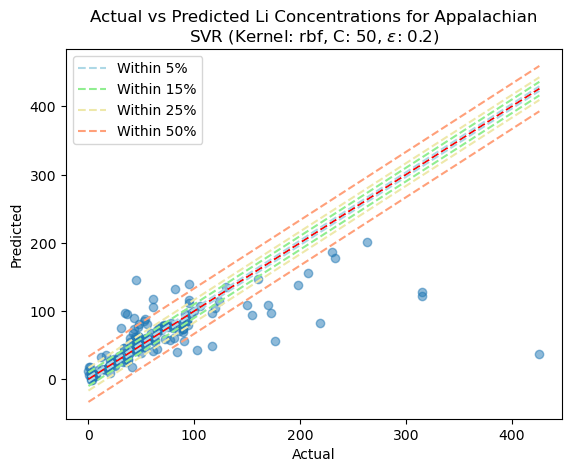

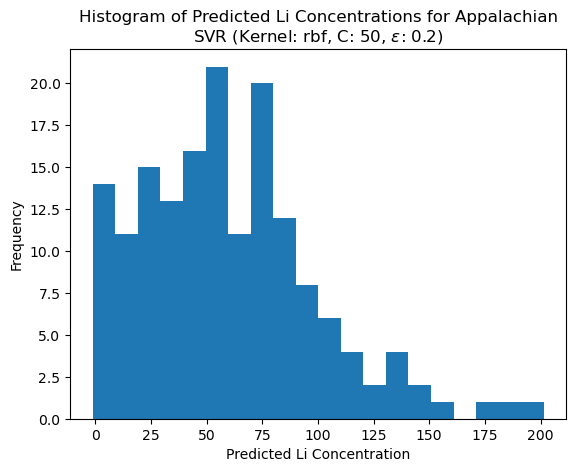

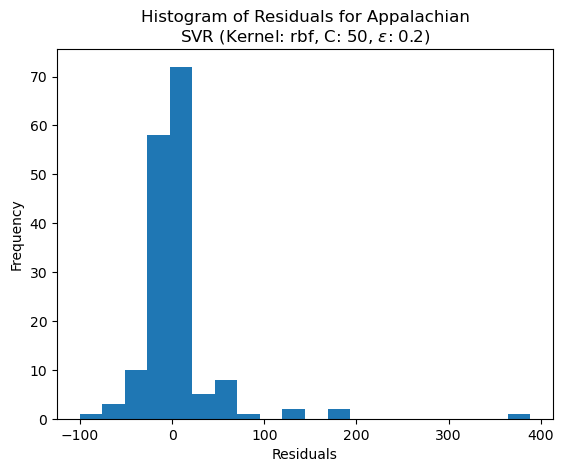

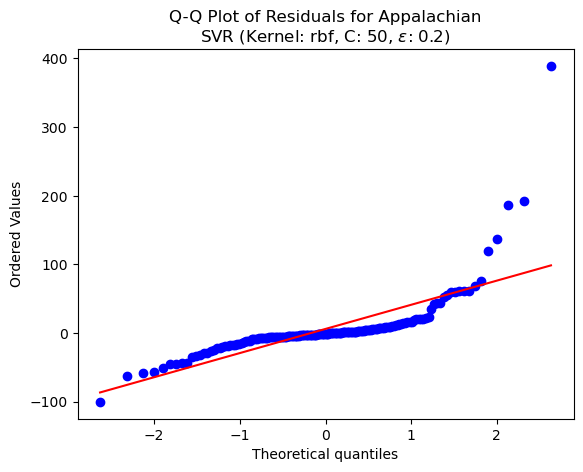

Permian
Number of data points:  481
Number of samples in the training dataset: 360
Best parameters: {'C': 5, 'epsilon': 0.2, 'kernel': 'sigmoid'}
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 4106.050815531726
MSE of the model: 4045.305584665702
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 63.602716802552564
MAE of the best KNN model: 13.970250140643726
-------------------------------
R-squared (Coefficient of Determination): 0.01479407674065969
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  15.702479338842975
±15%:  46.28099173553719
±25%:  63.63636363636363
±50%:  81.81818181818183
-------------------------------
Minimum percentage difference: 0.51%
Maximum percentage difference: 1000.66%
-------------------------------
Quantile

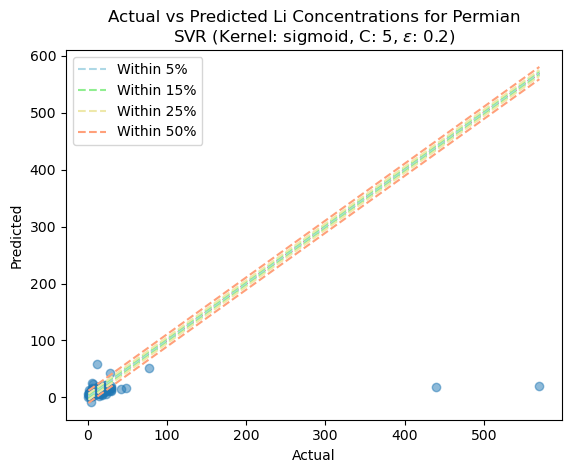

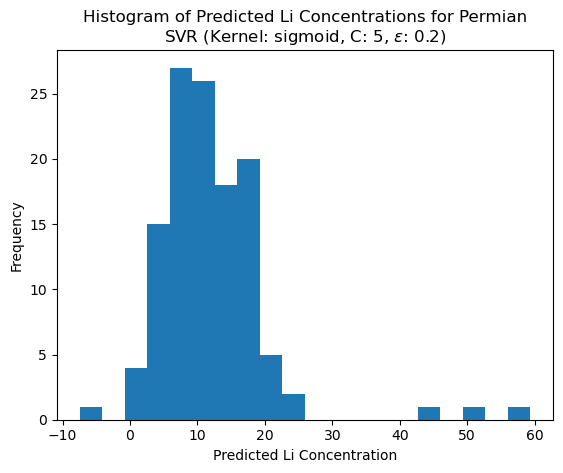

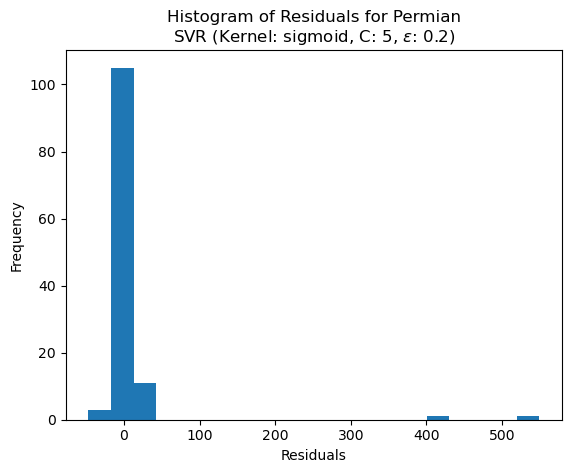

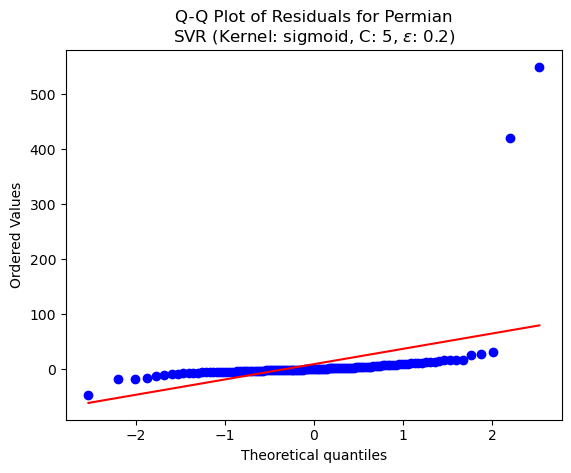

Oklahoma Platform
Number of data points:  254
Number of samples in the training dataset: 190
Best parameters: {'C': 50, 'epsilon': 0.2, 'kernel': 'rbf'}
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 308.3989183593751
MSE of the model: 190.69439854810352
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 13.80921426251702
MAE of the best KNN model: 10.114067124283672
-------------------------------
R-squared (Coefficient of Determination): 0.3816632056864455
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  12.5
±15%:  23.4375
±25%:  39.0625
±50%:  67.1875
-------------------------------
Minimum percentage difference: 5.11%
Maximum percentage difference: 330.54%
-------------------------------
Quantile regression loss:
Quantile 0.25: 3.6449

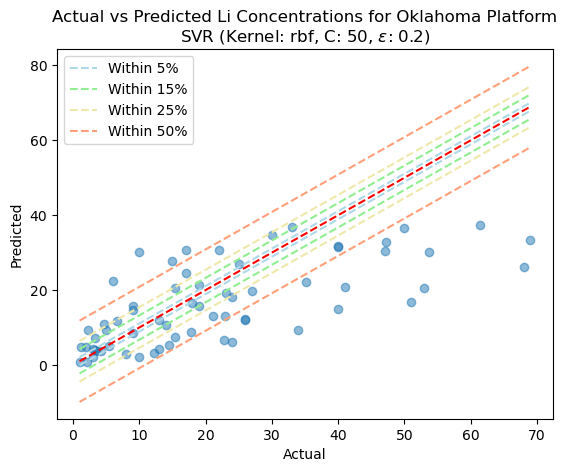

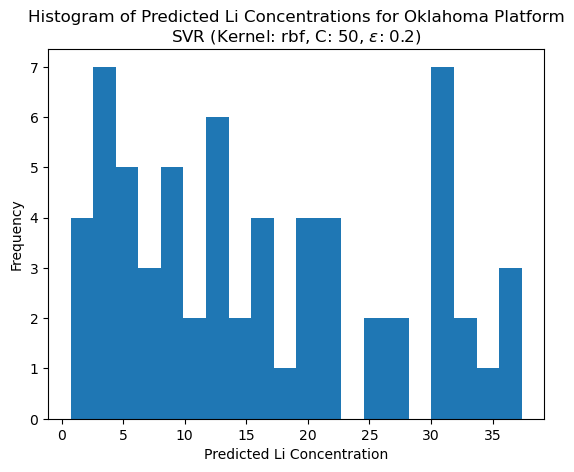

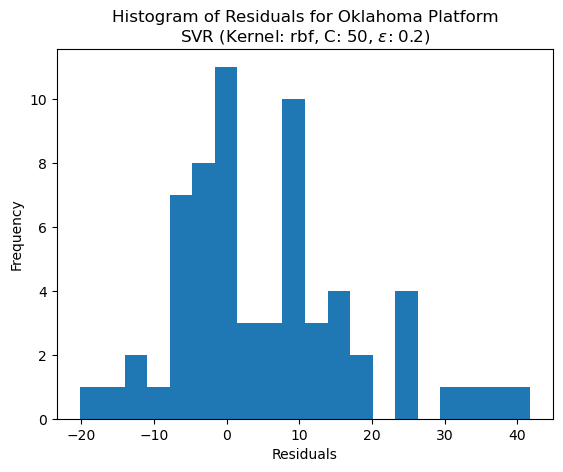

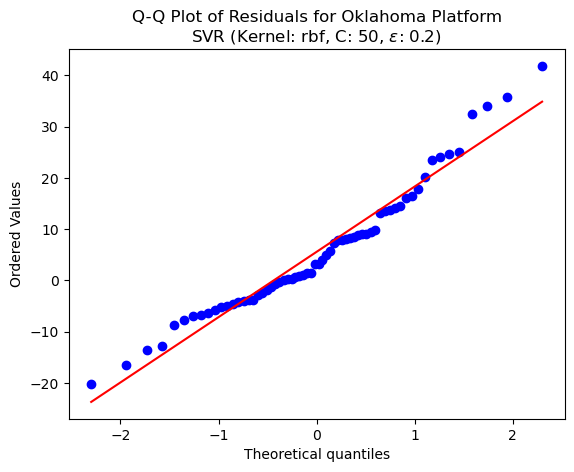

Gulf Coast
Number of data points:  888
Number of samples in the training dataset: 666
Best parameters: {'C': 50, 'epsilon': 0.2, 'kernel': 'rbf'}
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 19313.61518772352
MSE of the model: 12733.489156997246
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 112.842762980163
MAE of the best KNN model: 16.692875781054706
-------------------------------
R-squared (Coefficient of Determination): 0.34069882654122996
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  50.45045045045045
±15%:  72.07207207207207
±25%:  78.82882882882883
±50%:  91.44144144144144
-------------------------------
Minimum percentage difference: 0.78%
Maximum percentage difference: 1538.96%
-------------------------------
Quantile r

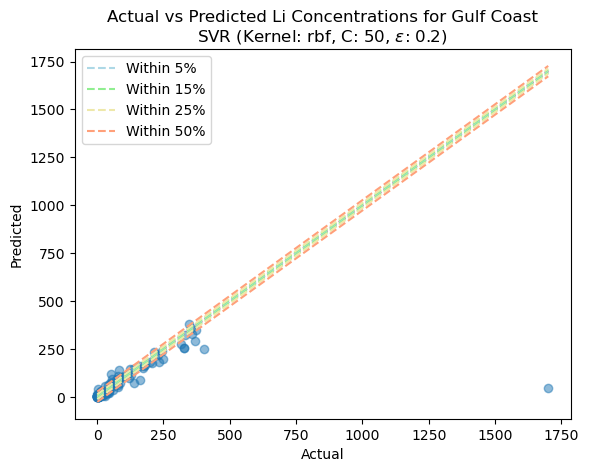

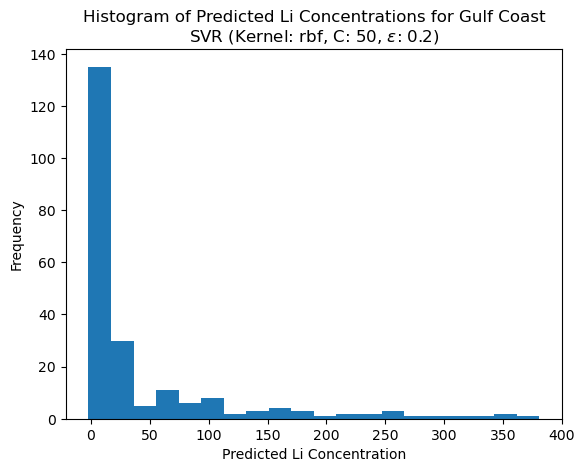

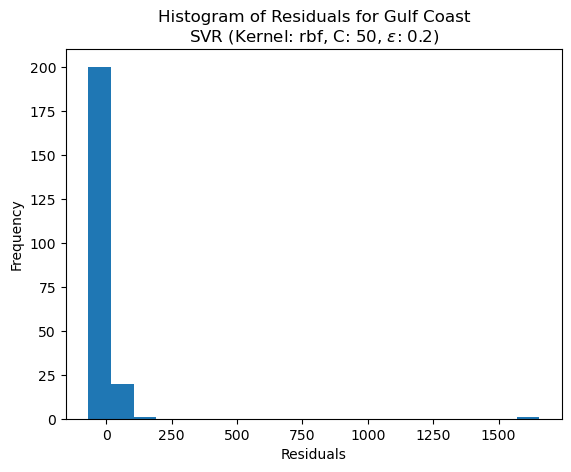

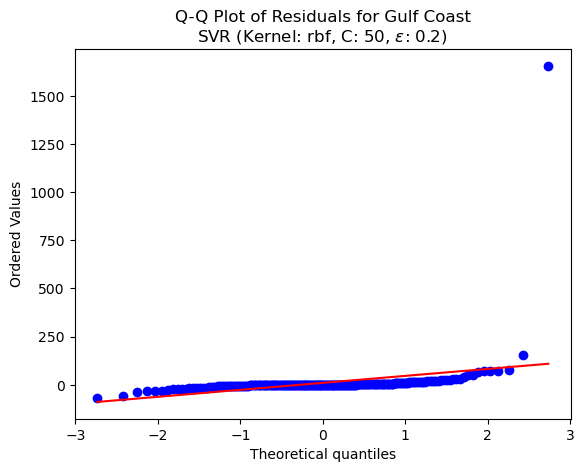

Williston
Number of data points:  502
Number of samples in the training dataset: 376
Best parameters: {'C': 50, 'epsilon': 0.2, 'kernel': 'rbf'}
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 2013.4464867274216
MSE of the model: 632.303044475057
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 25.145636688599815
MAE of the best KNN model: 11.367932941299609
-------------------------------
R-squared (Coefficient of Determination): 0.6859598461428302
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  22.22222222222222
±15%:  52.38095238095239
±25%:  65.87301587301587
±50%:  83.33333333333334
-------------------------------
Minimum percentage difference: 0.60%
Maximum percentage difference: 28384.84%
-------------------------------
Quantile r

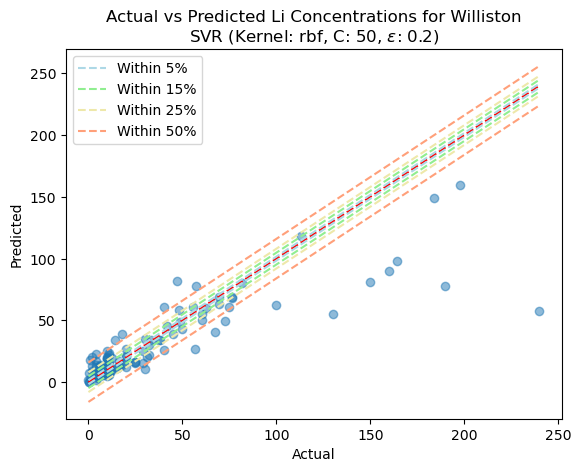

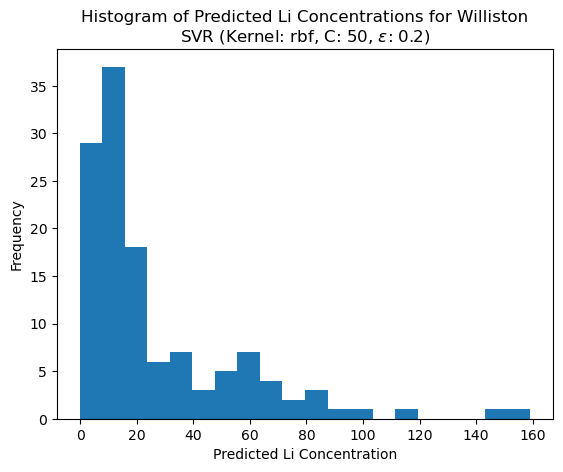

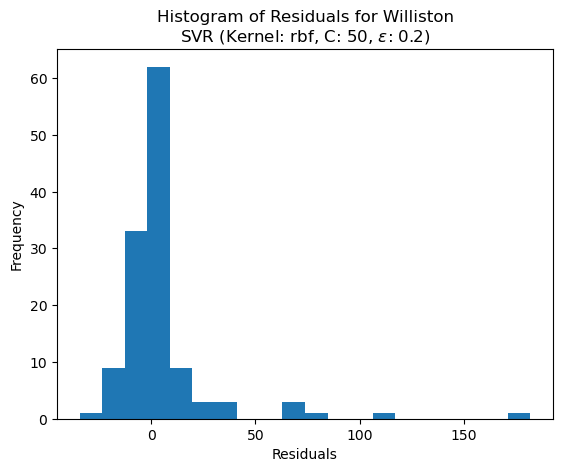

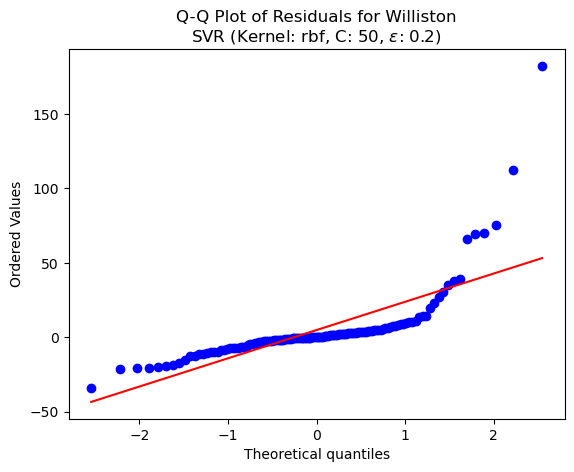

Michigan
Number of data points:  150
Number of samples in the training dataset: 112
Best parameters: {'C': 5, 'epsilon': 0.01, 'kernel': 'sigmoid'}
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 338.1750457756233
MSE of the model: 184.27216781246452
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 13.574688497805926
MAE of the best KNN model: 10.528028068459482
-------------------------------
R-squared (Coefficient of Determination): 0.4550982690345291
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  5.263157894736842
±15%:  18.421052631578945
±25%:  23.684210526315788
±50%:  76.31578947368422
-------------------------------
Minimum percentage difference: 0.88%
Maximum percentage difference: 1102.91%
-------------------------------
Quant

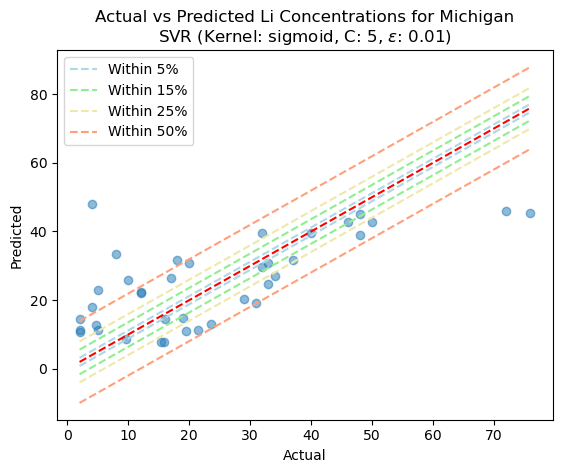

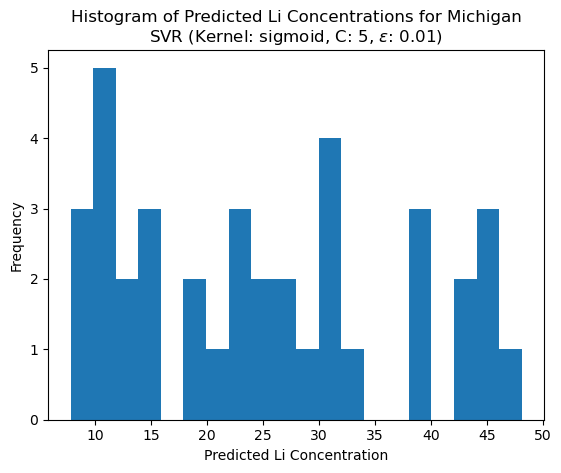

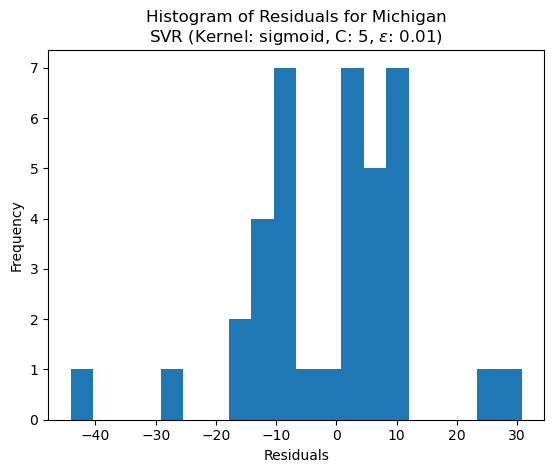

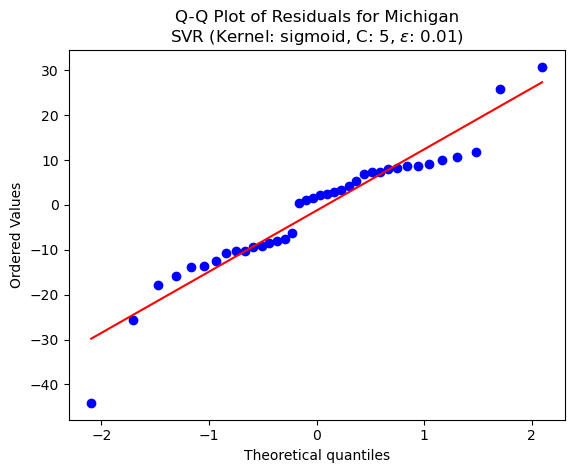

Pacific
Number of data points:  145
Number of samples in the training dataset: 108
Best parameters: {'C': 50, 'epsilon': 0.05, 'kernel': 'rbf'}
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 8.383484514243975
MSE of the model: 3.004972078561876
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 1.733485528800825
MAE of the best KNN model: 0.8931211147745718
-------------------------------
R-squared (Coefficient of Determination): 0.6415604903359369
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  18.91891891891892
±15%:  40.54054054054054
±25%:  62.16216216216216
±50%:  83.78378378378379
-------------------------------
Minimum percentage difference: 1.78%
Maximum percentage difference: 3952.91%
-------------------------------
Quantile regr

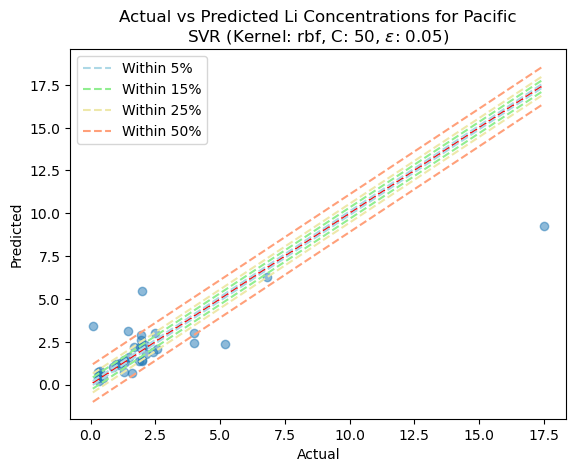

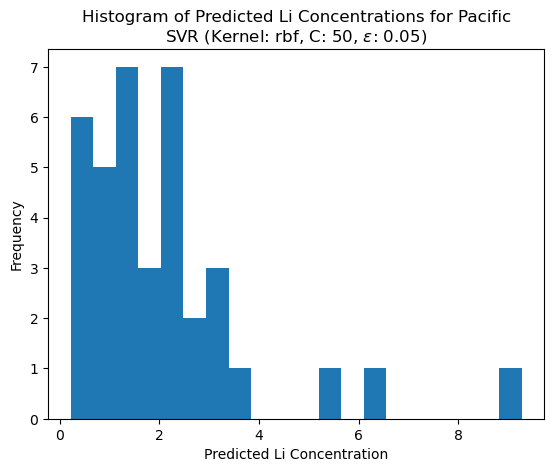

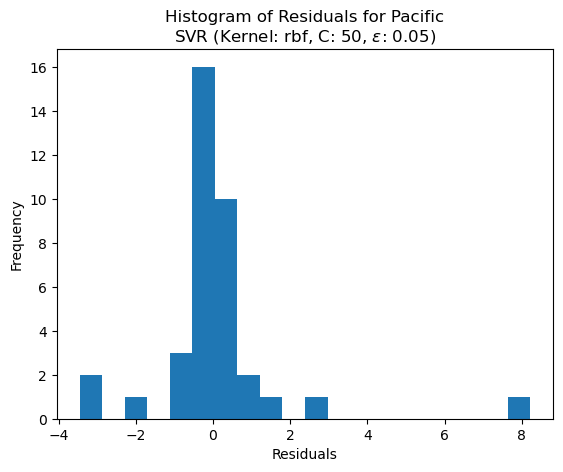

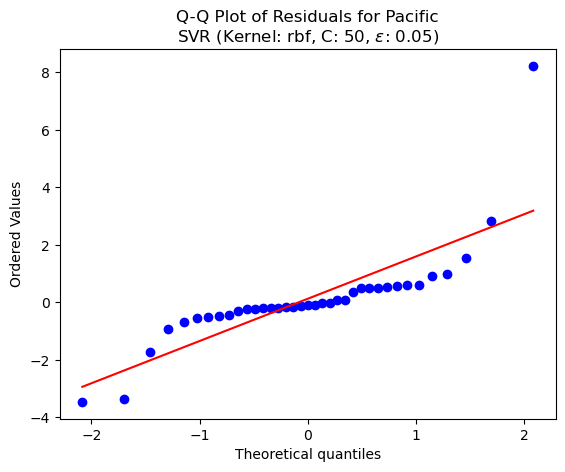

Illinois
Number of data points:  25
Number of samples in the training dataset: 18
Best parameters: {'C': 10, 'epsilon': 0.01, 'kernel': 'sigmoid'}
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 155.8923551020408
MSE of the model: 167.0564126966751
The model's MSE is close to or larger than the variance of the target variable.
The model's performance may be limited compared to the variability of the target variable.
RMSE of the model: 12.925030471789036
MAE of the best KNN model: 9.816166495311952
-------------------------------
R-squared (Coefficient of Determination): -0.07161388759138787
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  0.0
±15%:  14.285714285714285
±25%:  14.285714285714285
±50%:  57.14285714285714
-------------------------------
Minimum percentage difference: 9.61%
Maximum percentage difference: 381.85%
-------------------------------
Quantil

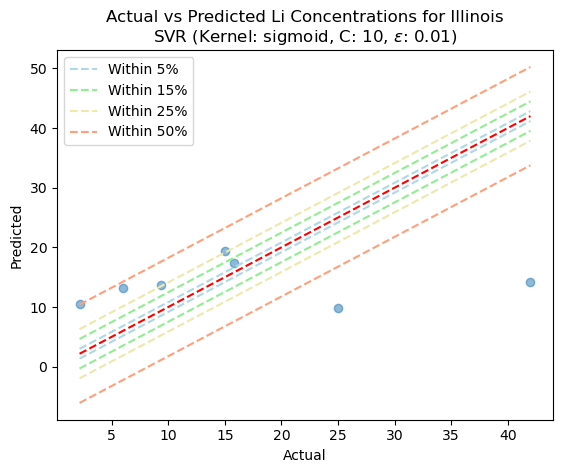

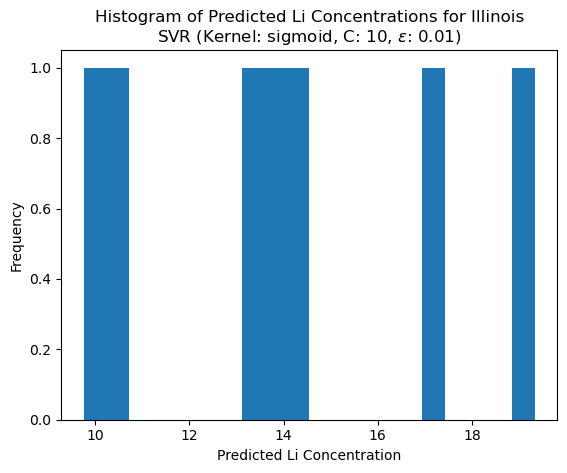

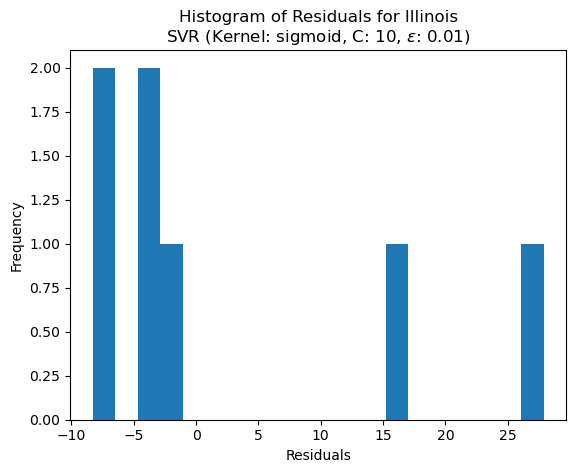

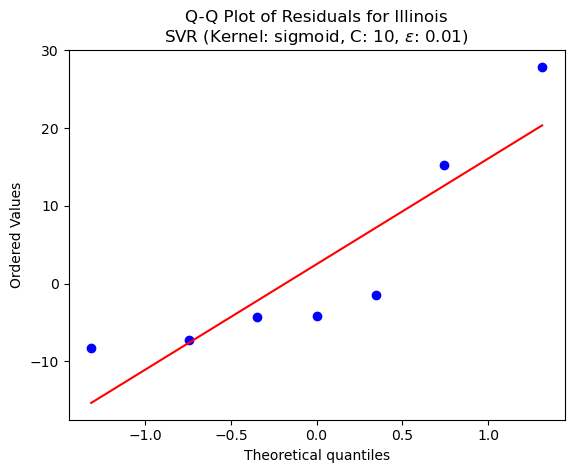

Great Plains
Number of data points:  62
Number of samples in the training dataset: 46
Best parameters: {'C': 50, 'epsilon': 0.1, 'kernel': 'rbf'}
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 30765.013448437494
MSE of the model: 32504.44769155123
The model's MSE is close to or larger than the variance of the target variable.
The model's performance may be limited compared to the variability of the target variable.
RMSE of the model: 180.28989902806876
MAE of the best KNN model: 47.13339523835176
-------------------------------
R-squared (Coefficient of Determination): -0.05653936235162216
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  56.25
±15%:  93.75
±25%:  93.75
±50%:  93.75
-------------------------------
Minimum percentage difference: 1.74%
Maximum percentage difference: 185.73%
-------------------------------
Quantile regression loss:
Quantile 0.25: 0.

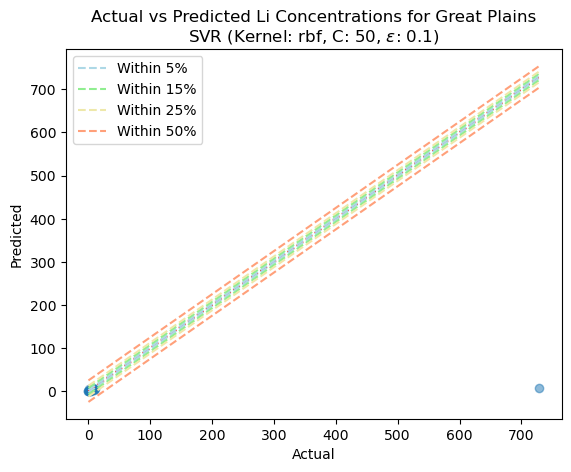

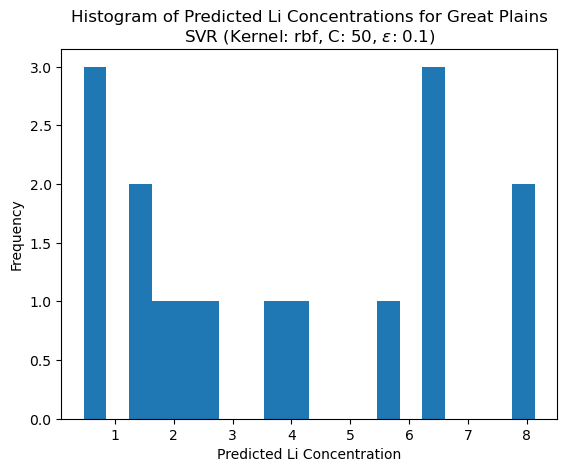

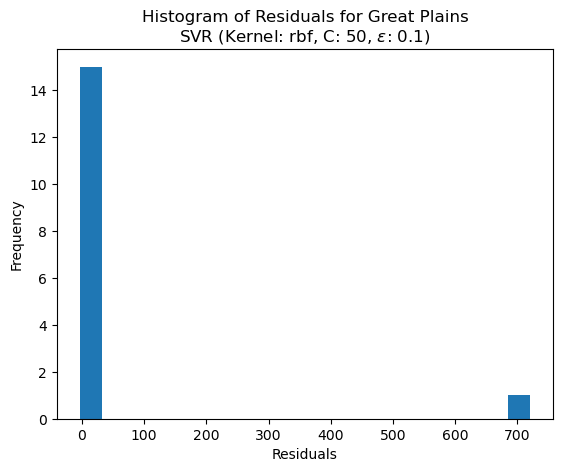

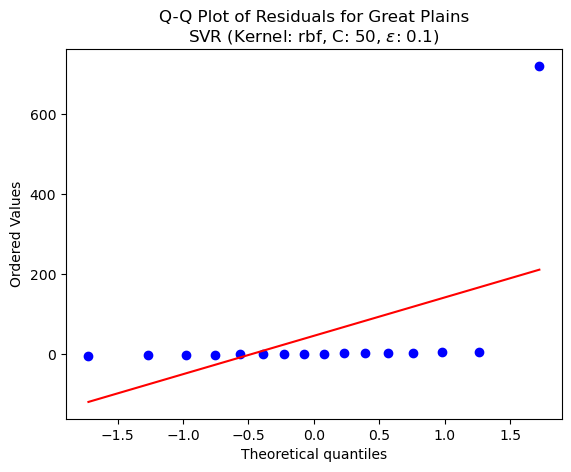

Anadarko
Number of data points:  262
Number of samples in the training dataset: 196
Best parameters: {'C': 50, 'epsilon': 0.2, 'kernel': 'rbf'}
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 8090.751883310373
MSE of the model: 5017.563201052185
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 70.83475983620036
MAE of the best KNN model: 18.430170816574872
-------------------------------
R-squared (Coefficient of Determination): 0.37983968938629453
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  37.878787878787875
±15%:  65.15151515151516
±25%:  72.72727272727273
±50%:  80.3030303030303
-------------------------------
Minimum percentage difference: 1.33%
Maximum percentage difference: 972.92%
-------------------------------
Quantile regr

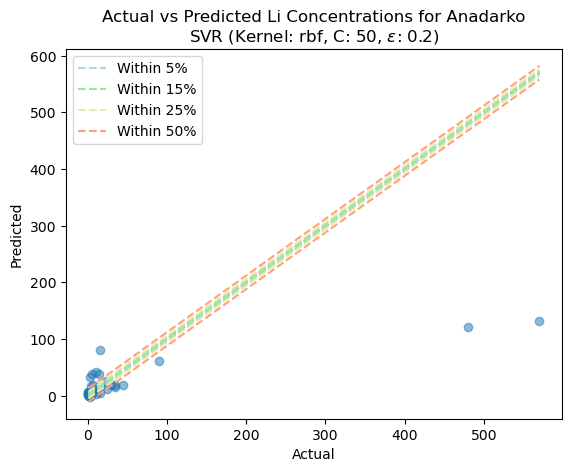

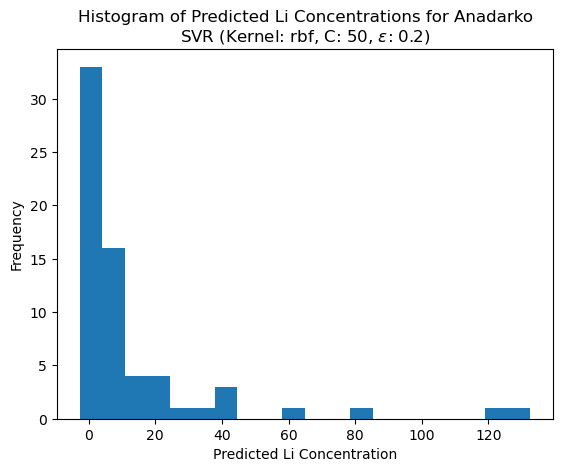

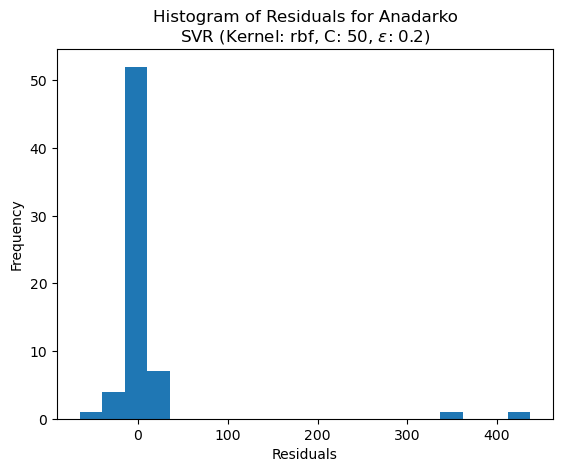

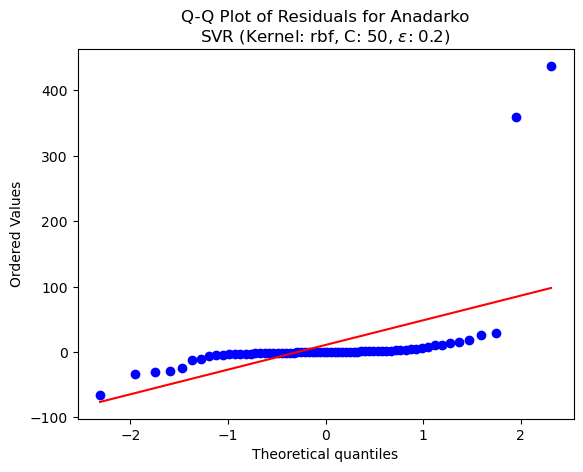

Rocky Mountain
Number of data points:  693
Number of samples in the training dataset: 519
Best parameters: {'C': 50, 'epsilon': 0.01, 'kernel': 'rbf'}
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 175.57252920134746
MSE of the model: 46.31649379677139
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 6.805622219663047
MAE of the best KNN model: 2.980864252287261
-------------------------------
R-squared (Coefficient of Determination): 0.7361973766200329
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  11.494252873563218
±15%:  40.804597701149426
±25%:  60.3448275862069
±50%:  81.60919540229885
-------------------------------
Minimum percentage difference: 0.03%
Maximum percentage difference: 1956.09%
-------------------------------
Quant

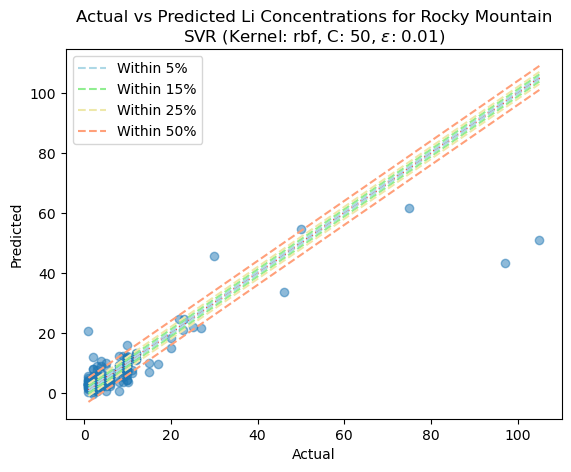

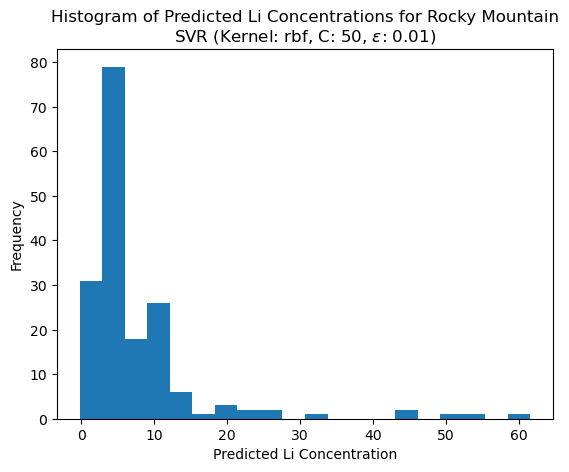

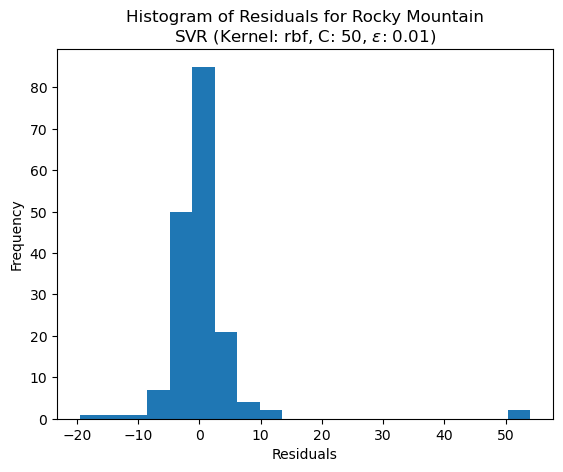

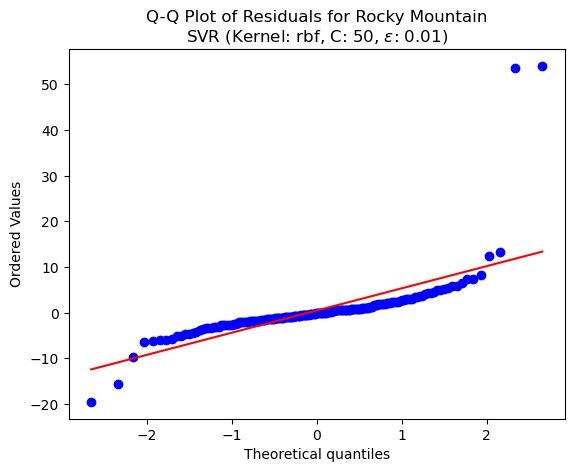

Fort Worth
Number of data points:  17
Number of samples in the training dataset: 12
Best parameters: {'C': 50, 'epsilon': 0.1, 'kernel': 'rbf'}
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 1038.8281839999997
MSE of the model: 930.6725126177774
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 30.50692565005162
MAE of the best KNN model: 17.006338404117166
-------------------------------
R-squared (Coefficient of Determination): 0.10411314695541829
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  0.0
±15%:  40.0
±25%:  60.0
±50%:  60.0
-------------------------------
Minimum percentage difference: 61.26%
Maximum percentage difference: 351.11%
-------------------------------
Quantile regression loss:
Quantile 0.25: 1.7432049311700024
Quan

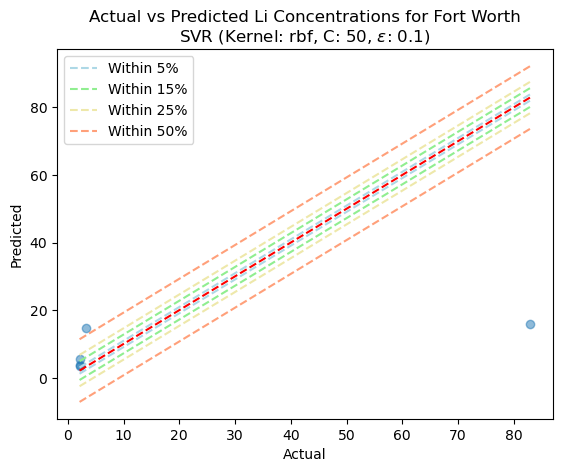

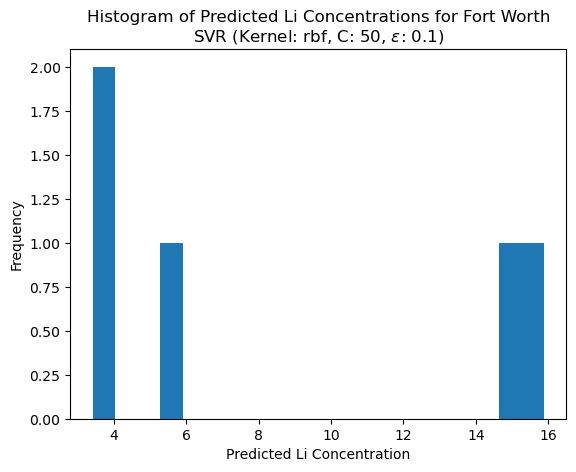

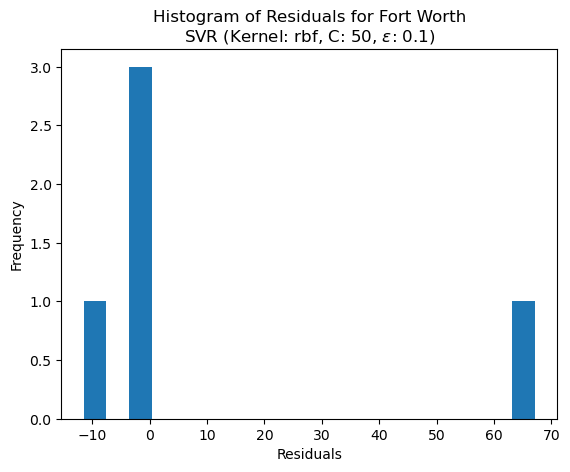

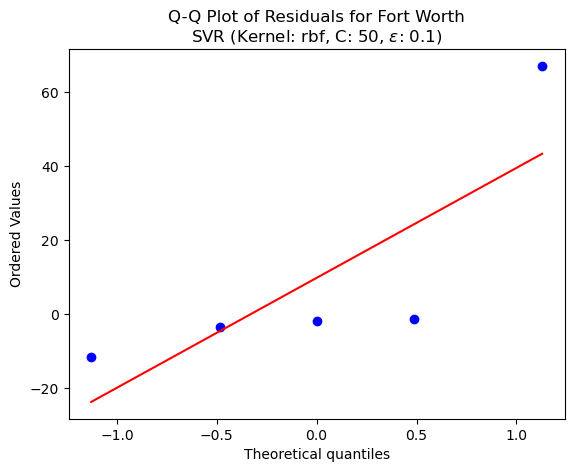

method data_input              Basin  data_row_count  feature_quantity  \
0     svr        pca        Appalachian             652                15   
1     svr        pca            Permian             481                15   
2     svr        pca  Oklahoma Platform             254                15   
3     svr        pca         Gulf Coast             888                15   
4     svr        pca          Williston             502                15   
5     svr        pca           Michigan             150                15   
6     svr        pca            Pacific             145                15   
7     svr        pca           Illinois              25                15   
8     svr        pca       Great Plains              62                15   
9     svr        pca           Anadarko             262                15   
10    svr        pca     Rocky Mountain             693                15   
11    svr        pca         Fort Worth              17                15   

                                         feature_list        kernel_options  \
0   [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...  [rbf, poly, sigmoid]   
1   [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...  [rbf, poly, sigmoid]   
2   [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...  [rbf, poly, sigmoid]   
3   [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...  [rbf, poly, sigmoid]   
4   [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...  [rbf, poly, sigmoid]   
5   [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...  [rbf, poly, sigmoid]   
6   [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...  [rbf, poly, sigmoid]   
7   [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...  [rbf, poly, sigmoid]   
8   [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...  [rbf, poly, sigmoid]   
9   [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...  [rbf, poly, sigmoid]   
10  [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...  [rbf, poly, sigmoid]   
11  [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...  [rbf, poly, sigmoid]   

   best_kernel                 c_options  best_c  ...  \
0          rbf  [0.1, 0.5, 1, 5, 10, 50]      50  ...   
1      sigmoid  [0.1, 0.5, 1, 5, 10, 50]       5  ...   
2          rbf  [0.1, 0.5, 1, 5, 10, 50]      50  ...   
3          rbf  [0.1, 0.5, 1, 5, 10, 50]      50  ...   
4          rbf  [0.1, 0.5, 1, 5, 10, 50]      50  ...   
5      sigmoid  [0.1, 0.5, 1, 5, 10, 50]       5  ...   
6          rbf  [0.1, 0.5, 1, 5, 10, 50]      50  ...   
7      sigmoid  [0.1, 0.5, 1, 5, 10, 50]      10  ...   
8          rbf  [0.1, 0.5, 1, 5, 10, 50]      50  ...   
9          rbf  [0.1, 0.5, 1, 5, 10, 50]      50  ...   
10         rbf  [0.1, 0.5, 1, 5, 10, 50]      50  ...   
11         rbf  [0.1, 0.5, 1, 5, 10, 50]      50  ...   

   Predicted Values ±5% of Actual  Predicted Values ±15% of Actual  \
0                           26.99                            59.51   
1                           15.70                            46.28   
2                           12.50                            23.44   
3                           50.45                            72.07   
4                           22.22                            52.38   
5                            5.26                            18.42   
6                           18.92                            40.54   
7                            0.00                            14.29   
8                           56.25                            93.75   
9                           37.88                            65.15   
10                          11.49                            40.80   
11                           0.00                            40.00   

    Predicted Values ±25% of Actual  Predicted Values ±50% of Actual  \
0                             69.94                            82.82   
1                             63.64                            81.82   
2                             39.06                            67.19   
3                             78

In [42]:
# Define all the variables...
basins = df['BASIN_CATEGORY'].unique()
data_input = 'pca'
test_size = 0.25
random_state = 42
kernel_values = ['rbf', 'poly', 'sigmoid']
c_values = [0.1, 0.5, 1, 5, 10, 50]
epsilon_values = [0.01, 0.05, 0.1, 0.2]

# Run the function...
df_results_pca = generate_svr_models_by_basin(df=df, data_input=data_input, basins=basins, test_size=test_size, random_state=random_state, kernel_values=kernel_values, c_values=c_values, epsilon_values=epsilon_values)
df_results_pca

### INPUT: No PCA

In [43]:
# Define the input df for this section
df = df_with_imputed.copy()

# Drop the columns that are not needed (reducing DF to have the same variables as what was input to PCA (see data preprocessing file for detail))
columns_to_drop = ['IDUSGS', 'API', 'DATESAMPLE', 'PLAYTYPE', 'WELLTYPE', 'FORMSIMPLE', 'STATE', 'COUNTY', 'PROVINCE', 'REGION', 
                   'WELLNAME', 'PERIOD', 'LATITUDE', 'LONGITUDE', 'DEPTHLOWER', 'CHARGEBAL', 'PH']
df.drop(columns_to_drop, axis=1, inplace=True)
print("Remaining columns: ", df.columns.values)

Remaining columns:  ['TDS' 'DEPTHUPPER' 'B' 'Ba' 'Br' 'HCO3' 'Ca' 'Cl' 'FeTot' 'K' 'Li' 'Mg'
 'Na' 'SO4' 'Sr' 'Zn' 'BASIN_CATEGORY']


Appalachian
Number of data points:  652
Number of samples in the training dataset: 489
Best parameters: {'C': 50, 'epsilon': 0.2, 'kernel': 'rbf'}
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 3942.0189754375397
MSE of the model: 2211.783468981007
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 47.0296020499962
MAE of the best KNN model: 21.637734142975525
-------------------------------
R-squared (Coefficient of Determination): 0.4389211511252269
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  23.31288343558282
±15%:  55.828220858895705
±25%:  68.09815950920245
±50%:  82.20858895705521
-------------------------------
Minimum percentage difference: 0.02%
Maximum percentage difference: 5104.98%
-------------------------------
Quantile 

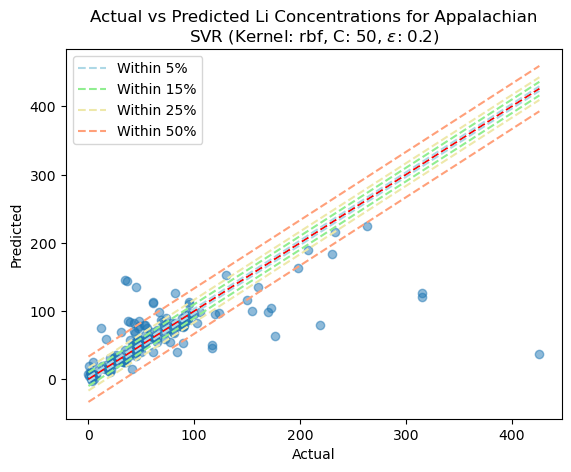

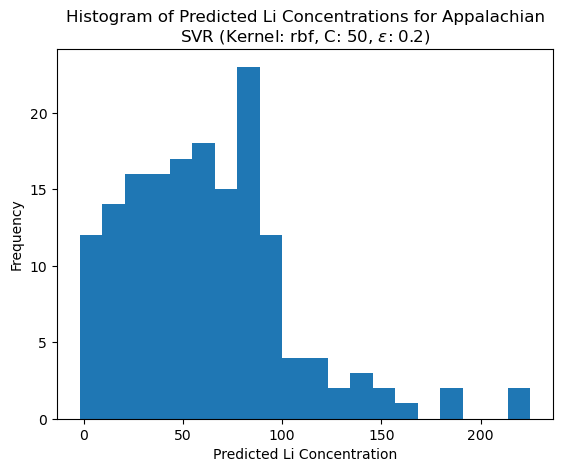

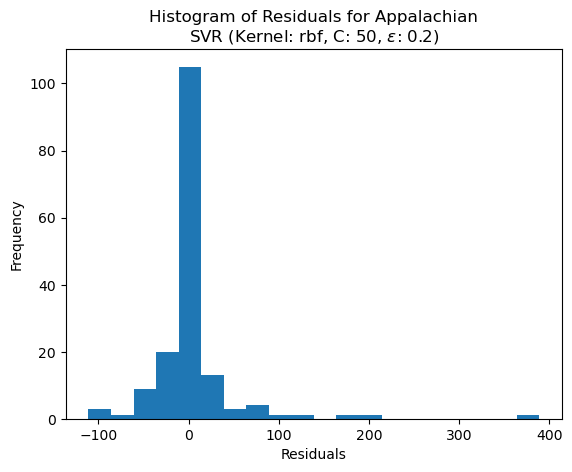

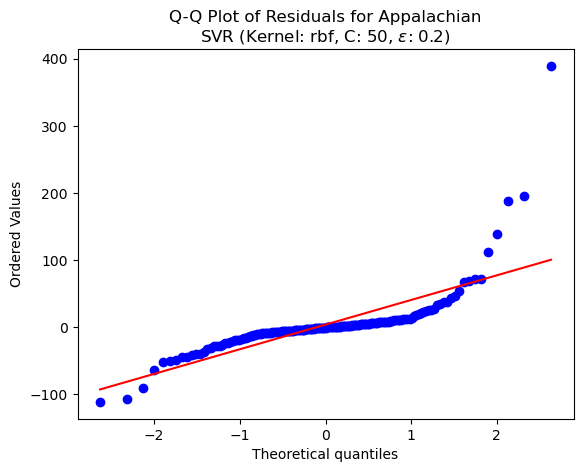

Permian
Number of data points:  481
Number of samples in the training dataset: 360
Best parameters: {'C': 5, 'epsilon': 0.2, 'kernel': 'sigmoid'}
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 4106.050815531726
MSE of the model: 3642.2634014279247
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 60.351167357623865
MAE of the best KNN model: 15.248592155171384
-------------------------------
R-squared (Coefficient of Determination): 0.11295218567423937
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  9.090909090909092
±15%:  31.40495867768595
±25%:  47.107438016528924
±50%:  78.51239669421489
-------------------------------
Minimum percentage difference: 0.22%
Maximum percentage difference: 2307.57%
-------------------------------
Quantil

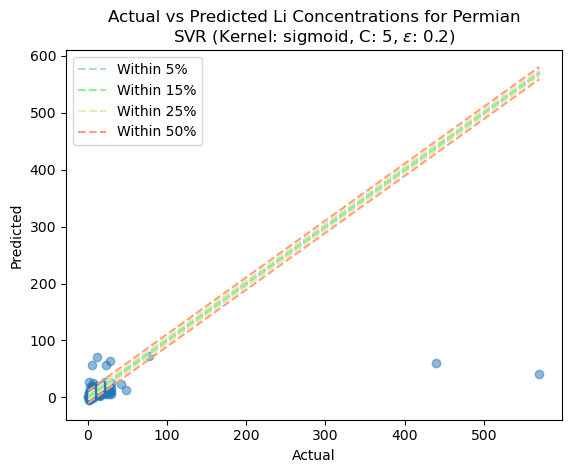

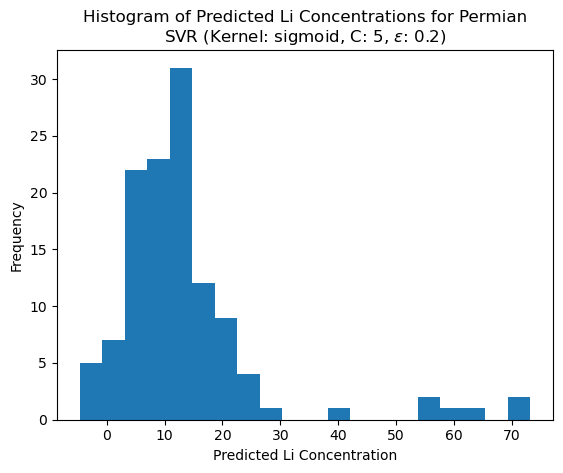

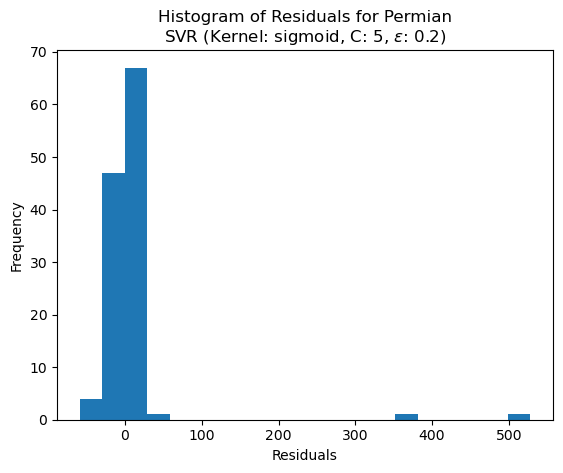

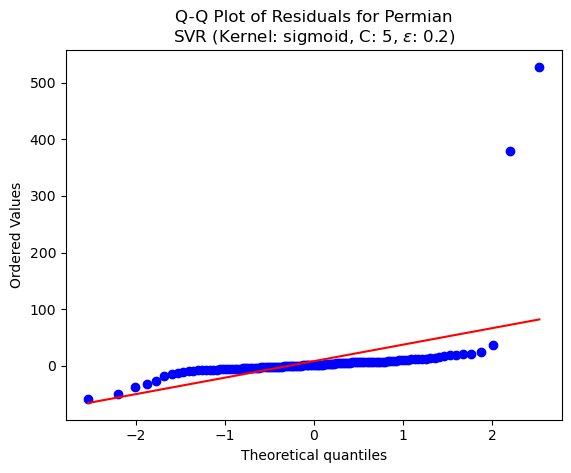

Oklahoma Platform
Number of data points:  254
Number of samples in the training dataset: 190
Best parameters: {'C': 50, 'epsilon': 0.2, 'kernel': 'rbf'}
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 308.3989183593751
MSE of the model: 204.47086675275682
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 14.29933098969168
MAE of the best KNN model: 9.813124540247554
-------------------------------
R-squared (Coefficient of Determination): 0.33699227013990873
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  10.9375
±15%:  35.9375
±25%:  51.5625
±50%:  64.0625
-------------------------------
Minimum percentage difference: 0.34%
Maximum percentage difference: 578.74%
-------------------------------
Quantile regression loss:
Quantile 0.25: 2.2

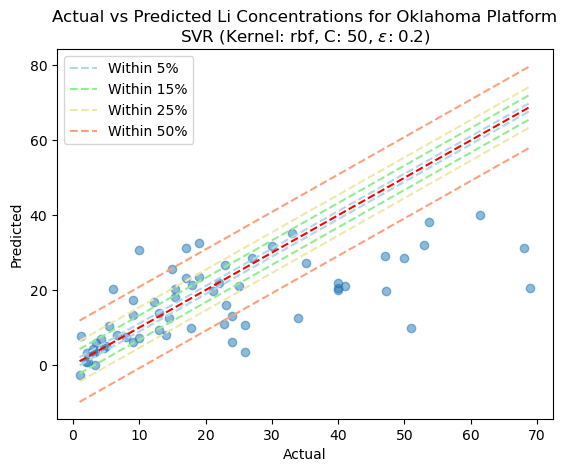

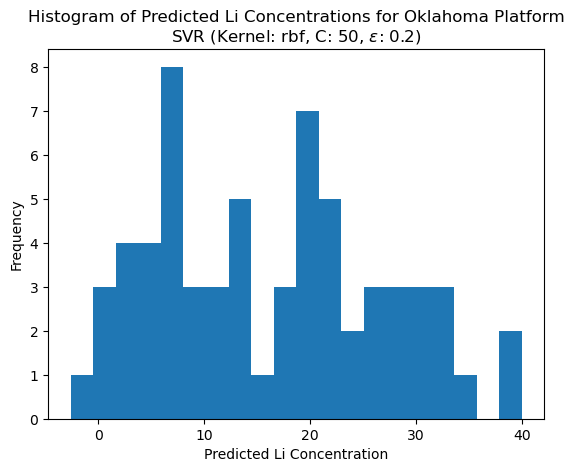

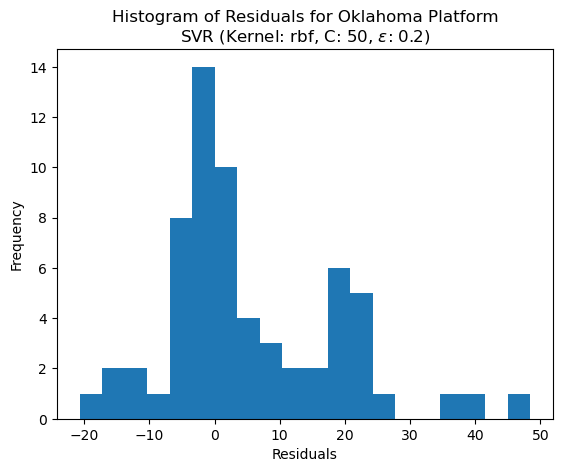

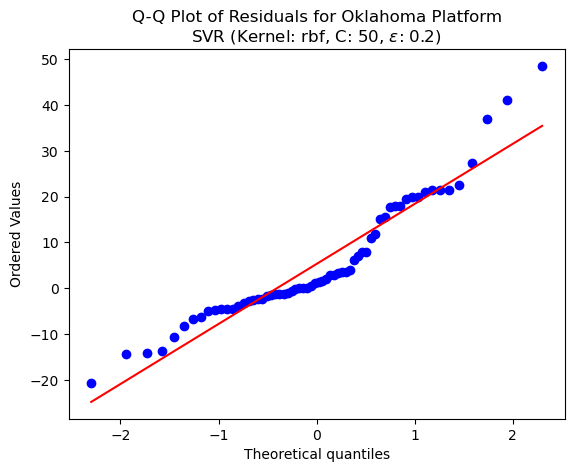

Gulf Coast
Number of data points:  888
Number of samples in the training dataset: 666
Best parameters: {'C': 50, 'epsilon': 0.2, 'kernel': 'rbf'}
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 19313.61518772352
MSE of the model: 12706.056259048455
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 112.72114379764098
MAE of the best KNN model: 17.411919568767935
-------------------------------
R-squared (Coefficient of Determination): 0.3421192182018358
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  50.9009009009009
±15%:  71.62162162162163
±25%:  77.92792792792793
±50%:  89.1891891891892
-------------------------------
Minimum percentage difference: 0.05%
Maximum percentage difference: 1669.57%
-------------------------------
Quantile re

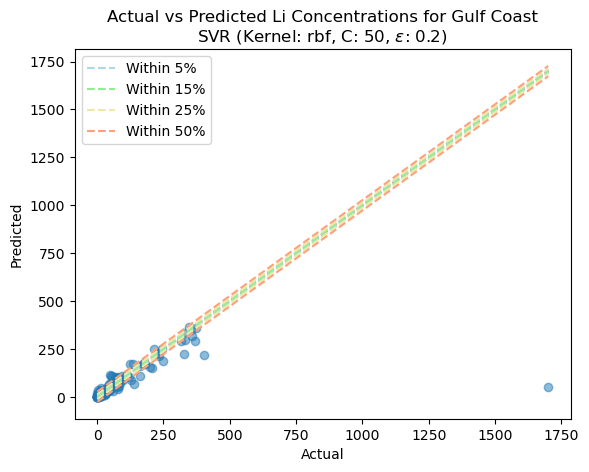

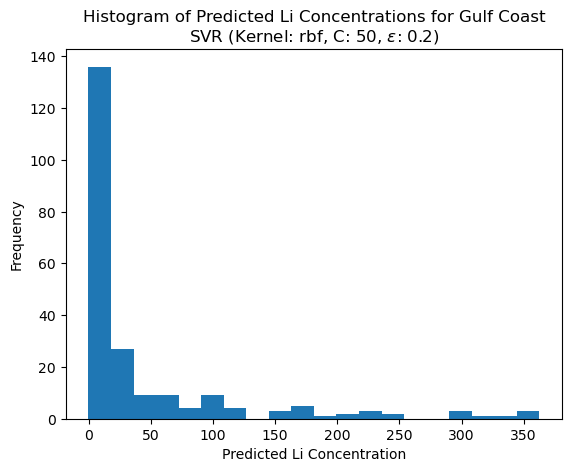

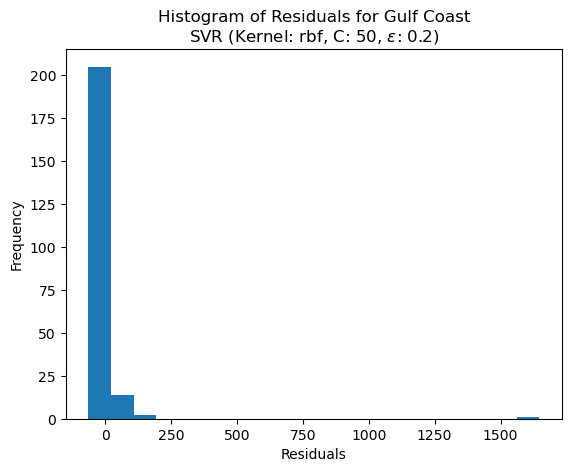

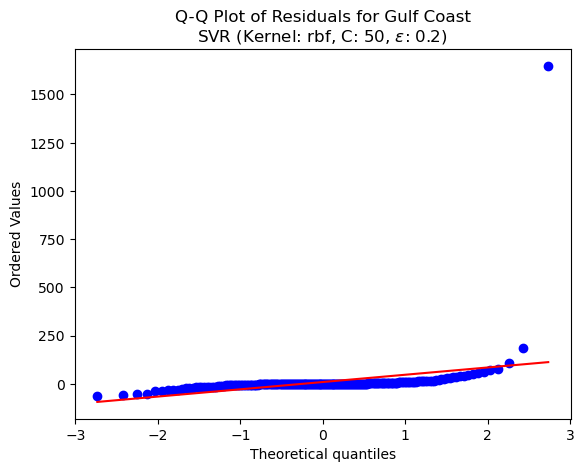

Williston
Number of data points:  502
Number of samples in the training dataset: 376
Best parameters: {'C': 50, 'epsilon': 0.2, 'kernel': 'poly'}
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 2013.4464867274216
MSE of the model: 332127.05923433334
The model's MSE is close to or larger than the variance of the target variable.
The model's performance may be limited compared to the variability of the target variable.
RMSE of the model: 576.3046583486318
MAE of the best KNN model: 67.02519121173205
-------------------------------
R-squared (Coefficient of Determination): -163.95450036725836
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  17.46031746031746
±15%:  41.269841269841265
±25%:  59.523809523809526
±50%:  76.19047619047619
-------------------------------
Minimum percentage difference: 0.22%
Maximum percentage difference: 152831.91%
-----------------------

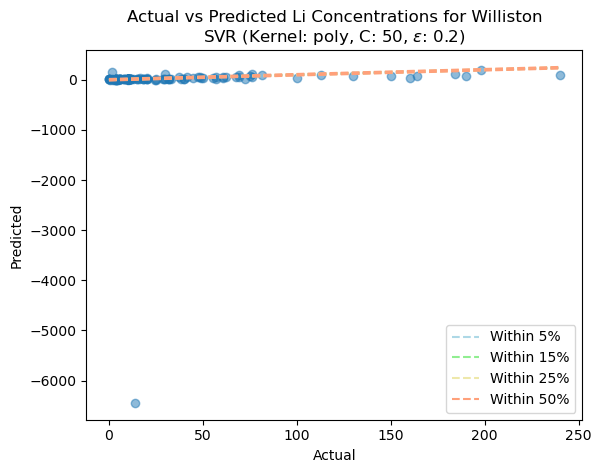

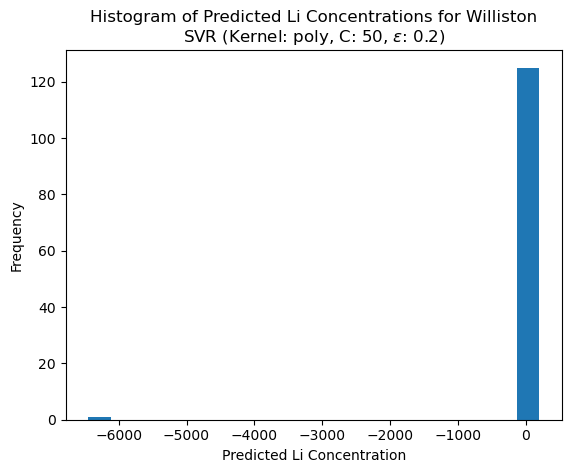

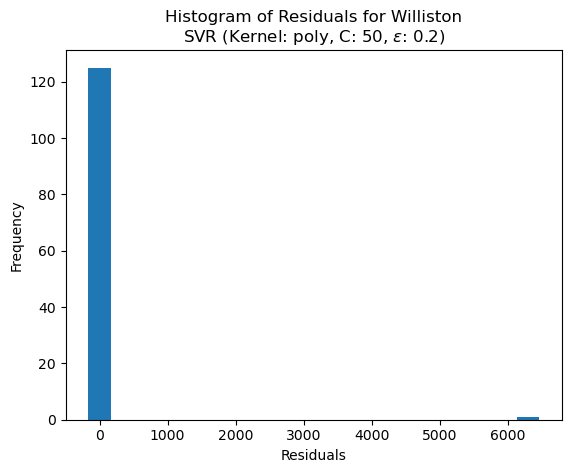

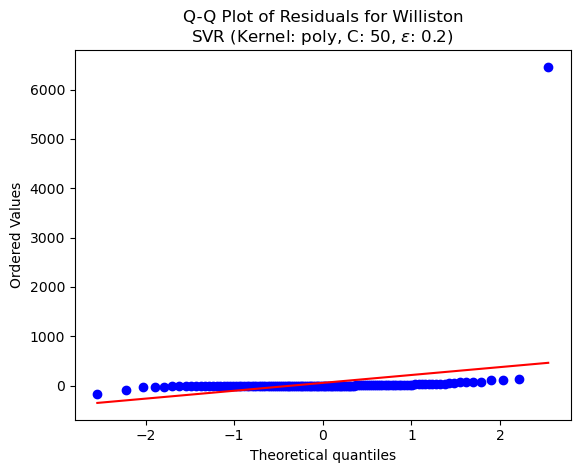

Michigan
Number of data points:  150
Number of samples in the training dataset: 112
Best parameters: {'C': 50, 'epsilon': 0.01, 'kernel': 'rbf'}
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 338.1750457756233
MSE of the model: 122.05355451399132
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 11.047785050135221
MAE of the best KNN model: 7.901099415427673
-------------------------------
R-squared (Coefficient of Determination): 0.6390817239809794
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  21.052631578947366
±15%:  31.57894736842105
±25%:  47.368421052631575
±50%:  84.21052631578947
-------------------------------
Minimum percentage difference: 0.81%
Maximum percentage difference: 903.39%
-------------------------------
Quantile r

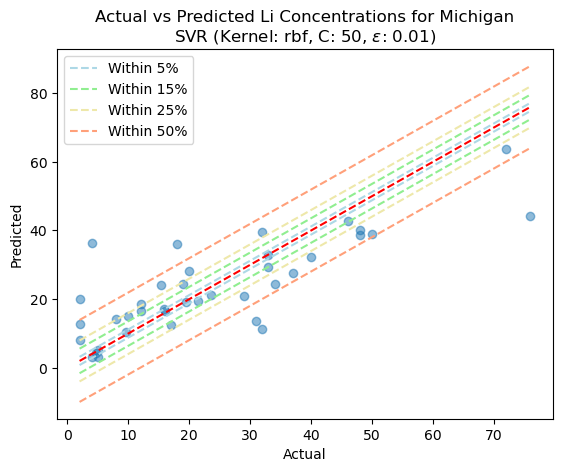

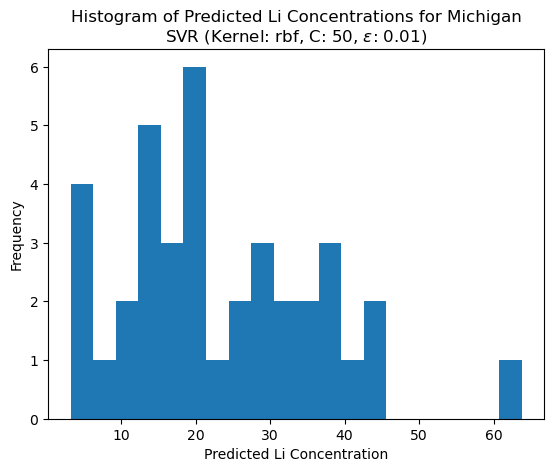

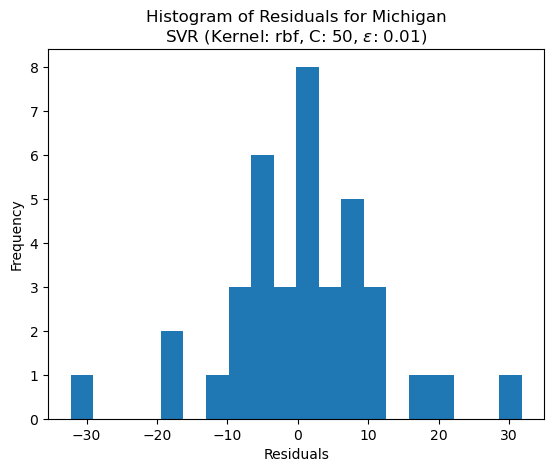

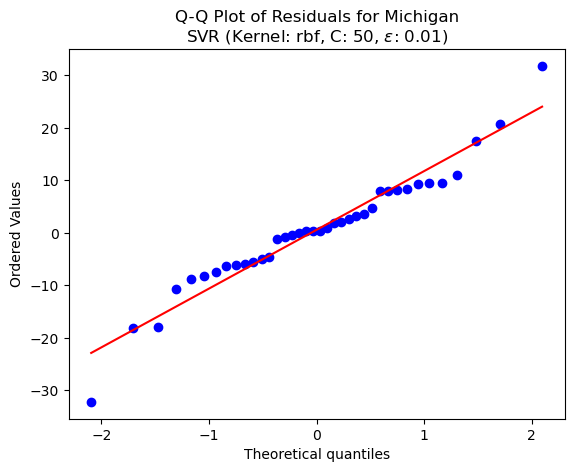

Pacific
Number of data points:  145
Number of samples in the training dataset: 108
Best parameters: {'C': 10, 'epsilon': 0.05, 'kernel': 'rbf'}
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 8.383484514243975
MSE of the model: 2.595537125912415
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 1.6110670767886777
MAE of the best KNN model: 0.9687535876032917
-------------------------------
R-squared (Coefficient of Determination): 0.690398768972202
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  13.513513513513514
±15%:  43.24324324324324
±25%:  56.75675675675676
±50%:  75.67567567567568
-------------------------------
Minimum percentage difference: 0.28%
Maximum percentage difference: 5444.16%
-------------------------------
Quantile reg

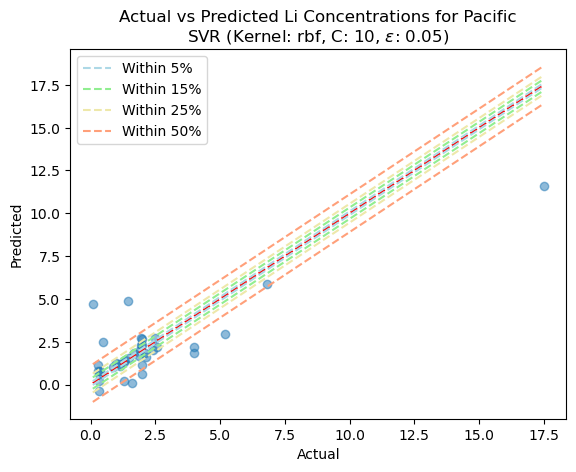

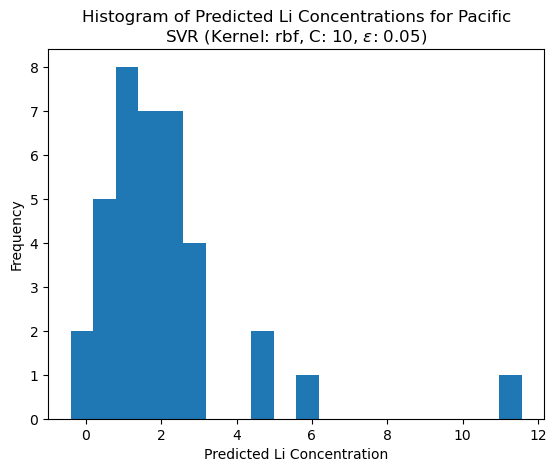

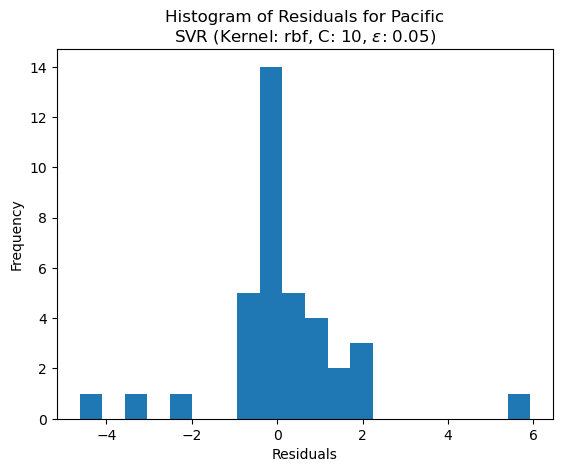

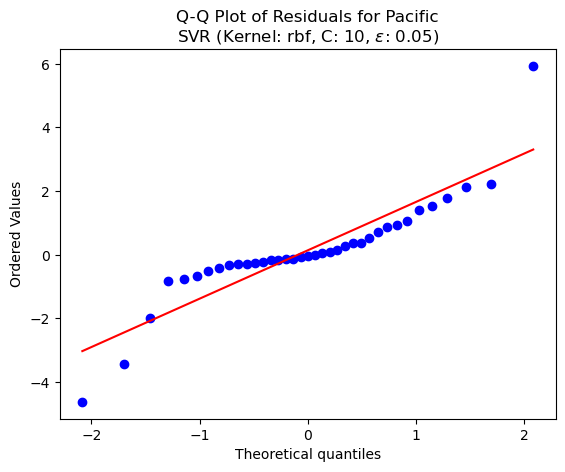

Illinois
Number of data points:  25
Number of samples in the training dataset: 18
Best parameters: {'C': 50, 'epsilon': 0.2, 'kernel': 'poly'}
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 155.8923551020408
MSE of the model: 71.71091146330893
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 8.468229535346154
MAE of the best KNN model: 6.743219251031887
-------------------------------
R-squared (Coefficient of Determination): 0.5399972537693085
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  14.285714285714285
±15%:  28.57142857142857
±25%:  28.57142857142857
±50%:  71.42857142857143
-------------------------------
Minimum percentage difference: 0.37%
Maximum percentage difference: 522.25%
-------------------------------
Quantile regres

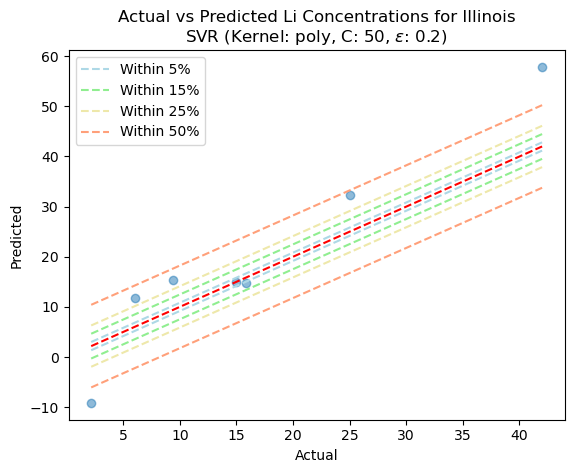

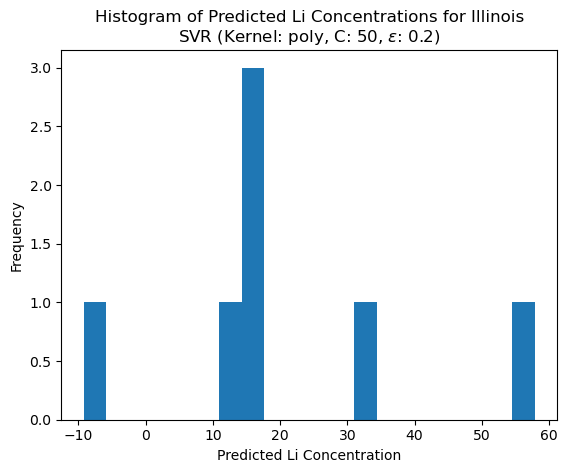

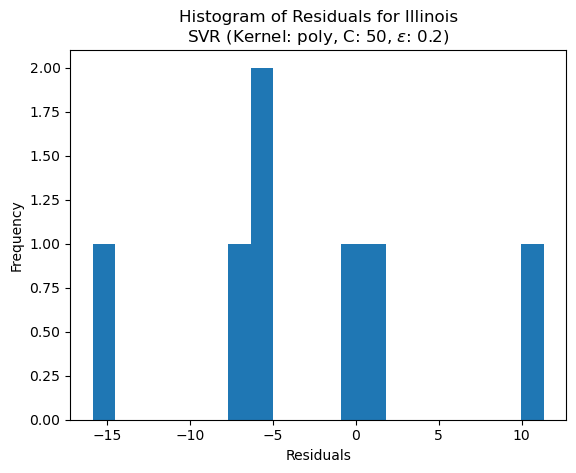

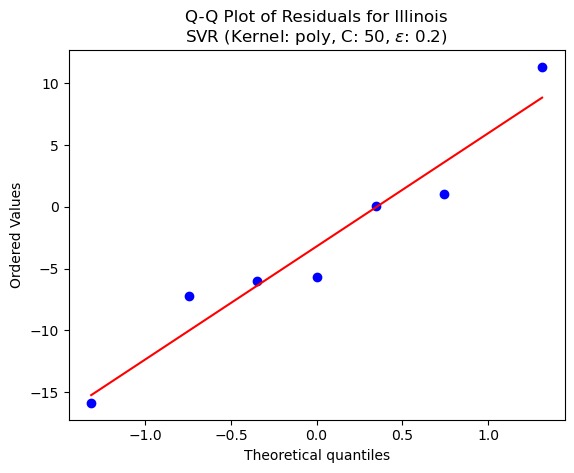

Great Plains
Number of data points:  62
Number of samples in the training dataset: 46
Best parameters: {'C': 5, 'epsilon': 0.05, 'kernel': 'sigmoid'}
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 30765.013448437494
MSE of the model: 33527.38009184912
The model's MSE is close to or larger than the variance of the target variable.
The model's performance may be limited compared to the variability of the target variable.
RMSE of the model: 183.10483361137443
MAE of the best KNN model: 47.88704201013781
-------------------------------
R-squared (Coefficient of Determination): -0.08978922268444256
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  56.25
±15%:  93.75
±25%:  93.75
±50%:  93.75
-------------------------------
Minimum percentage difference: 1.22%
Maximum percentage difference: 238.33%
-------------------------------
Quantile regression loss:
Quantile 0.25

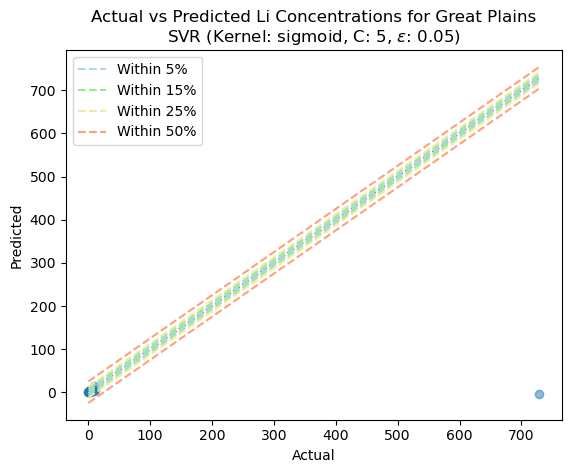

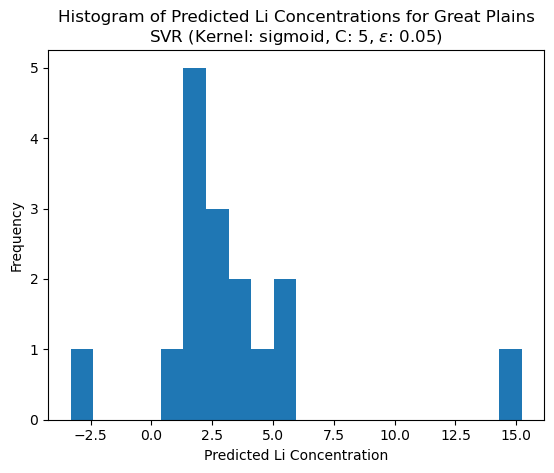

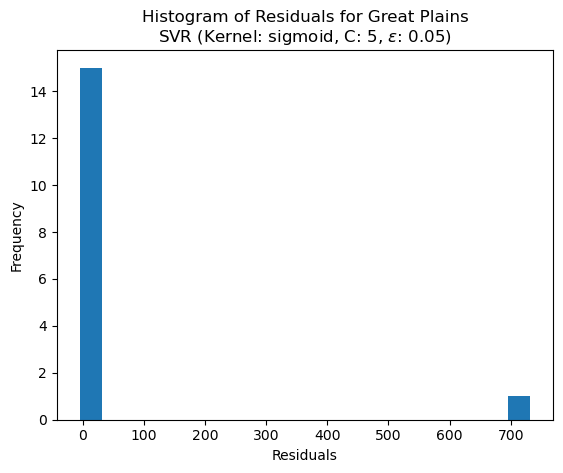

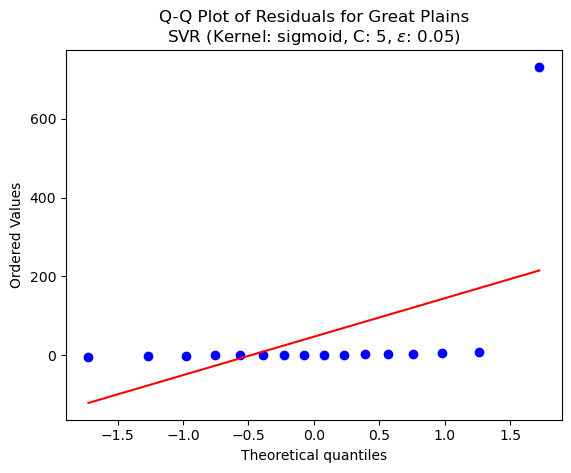

Anadarko
Number of data points:  262
Number of samples in the training dataset: 196
Best parameters: {'C': 50, 'epsilon': 0.2, 'kernel': 'rbf'}
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 8090.751883310373
MSE of the model: 5862.1384337494965
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 76.56460300784885
MAE of the best KNN model: 20.628915506060775
-------------------------------
R-squared (Coefficient of Determination): 0.2754519581990975
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  25.757575757575758
±15%:  57.57575757575758
±25%:  63.63636363636363
±50%:  75.75757575757575
-------------------------------
Minimum percentage difference: 0.04%
Maximum percentage difference: 1057.47%
-------------------------------
Quantile re

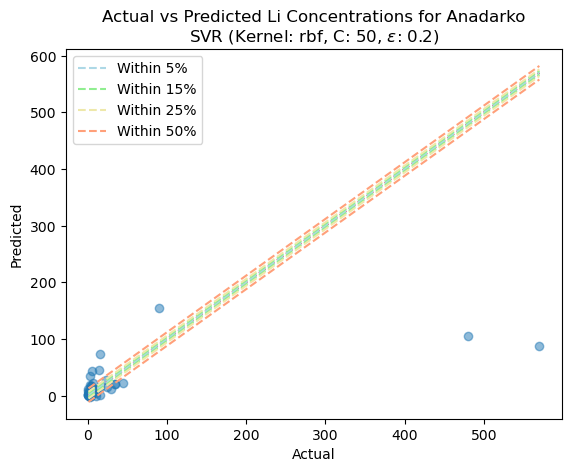

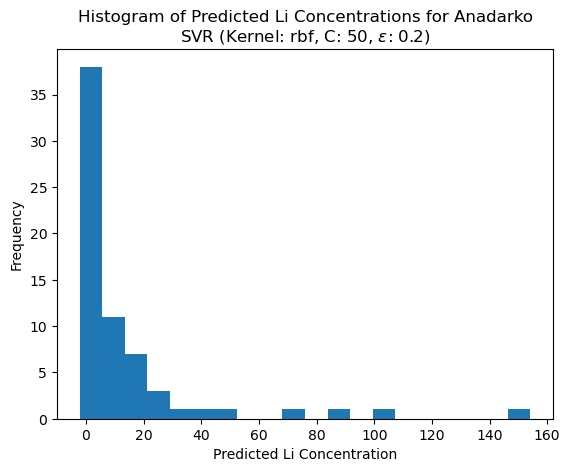

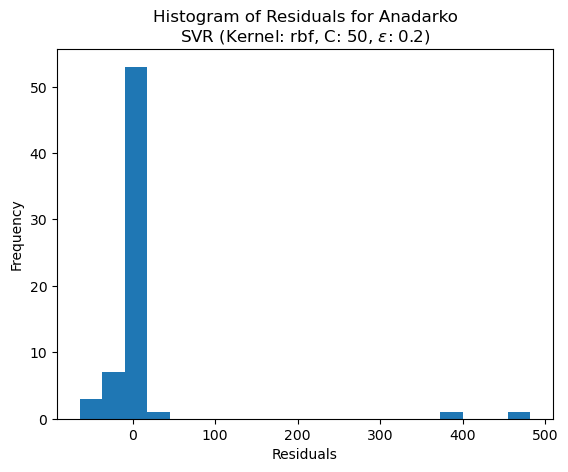

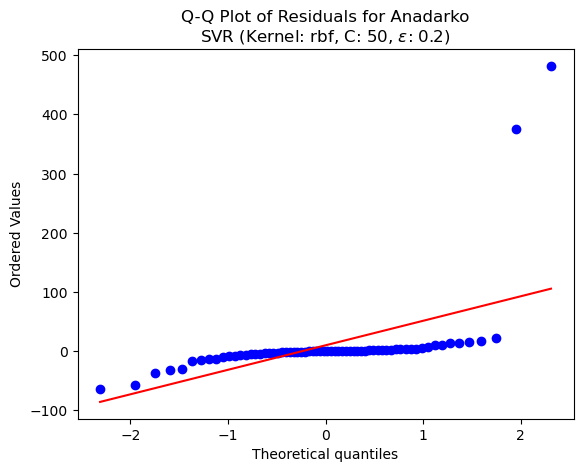

Rocky Mountain
Number of data points:  693
Number of samples in the training dataset: 519
Best parameters: {'C': 50, 'epsilon': 0.01, 'kernel': 'rbf'}
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 175.57252920134746
MSE of the model: 25.496674744945345
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 5.04942320913442
MAE of the best KNN model: 2.2956132915408967
-------------------------------
R-squared (Coefficient of Determination): 0.854779817429721
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  20.114942528735632
±15%:  49.42528735632184
±25%:  63.793103448275865
±50%:  88.50574712643679
-------------------------------
Minimum percentage difference: 0.16%
Maximum percentage difference: 917.13%
-------------------------------
Quant

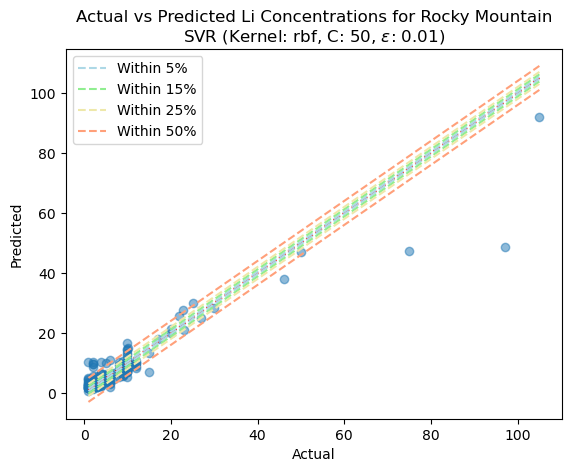

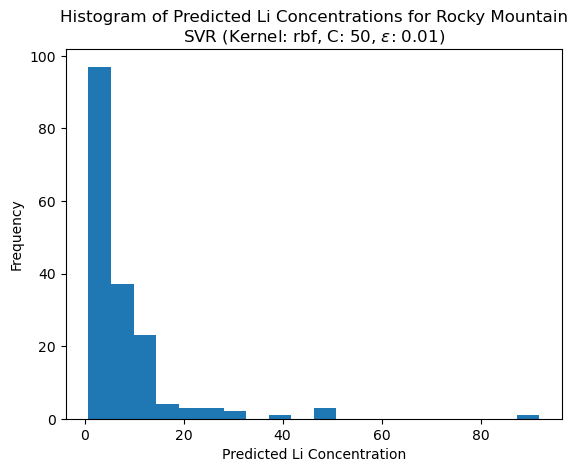

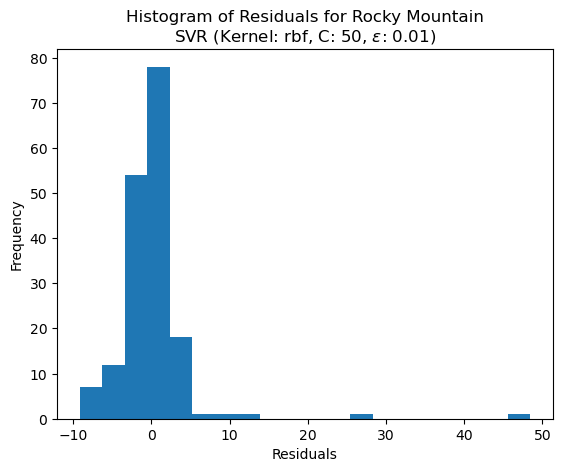

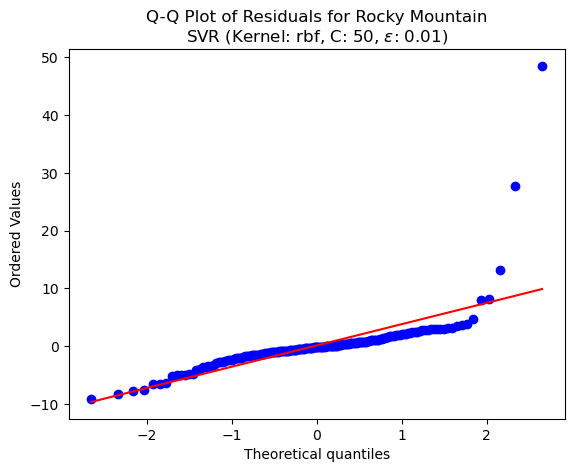

Fort Worth
Number of data points:  17
Number of samples in the training dataset: 12
Best parameters: {'C': 10, 'epsilon': 0.2, 'kernel': 'sigmoid'}
-------------------------------
MODEL PERFORMANCE METRICS
-------------------------------
Variance of the target variable: 1038.8281839999997
MSE of the model: 938.9834218029846
The model's MSE is smaller than the variance of the target variable.
The model is capturing a significant portion of the variability in the target variable.
RMSE of the model: 30.642836386388655
MAE of the best KNN model: 20.833301287940046
-------------------------------
R-squared (Coefficient of Determination): 0.09611287384653322
-------------------------------
Percentage of predictions within different tolerance levels:
±5%:  0.0
±15%:  0.0
±25%:  0.0
±50%:  40.0
-------------------------------
Minimum percentage difference: 78.30%
Maximum percentage difference: 742.52%
-------------------------------
Quantile regression loss:
Quantile 0.25: 5.419815593489721
Qu

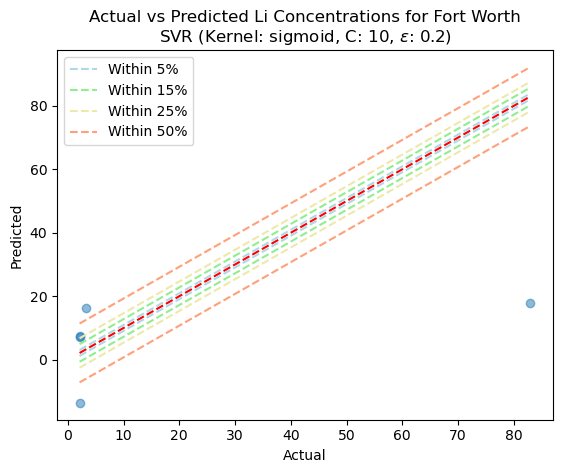

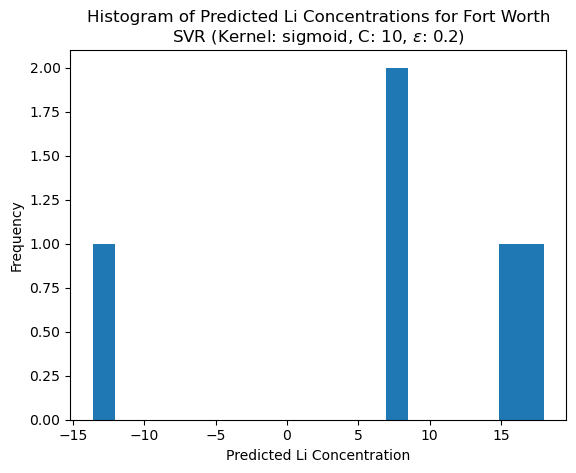

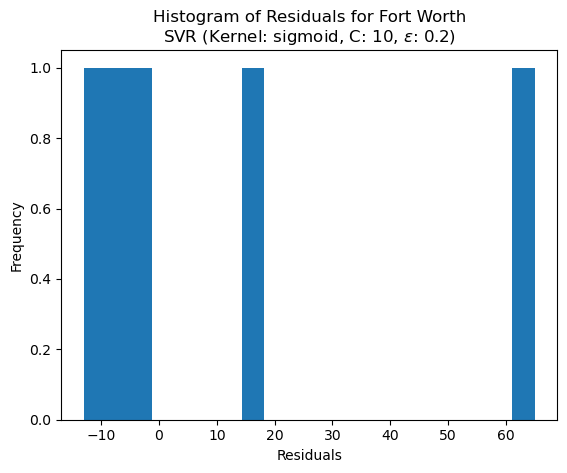

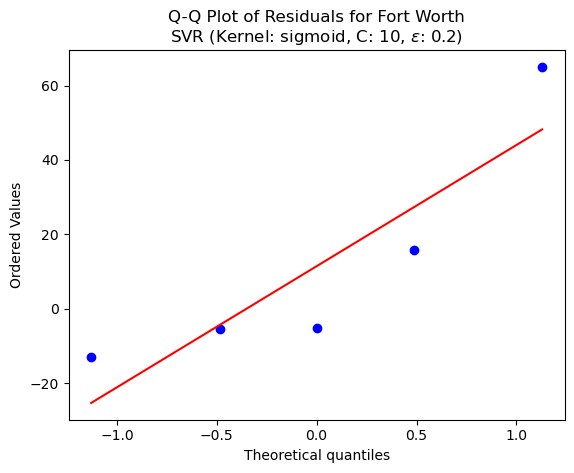

method data_input              Basin  data_row_count  feature_quantity  \
0     svr     no_pca        Appalachian             652                15   
1     svr     no_pca            Permian             481                15   
2     svr     no_pca  Oklahoma Platform             254                15   
3     svr     no_pca         Gulf Coast             888                15   
4     svr     no_pca          Williston             502                15   
5     svr     no_pca           Michigan             150                15   
6     svr     no_pca            Pacific             145                15   
7     svr     no_pca           Illinois              25                15   
8     svr     no_pca       Great Plains              62                15   
9     svr     no_pca           Anadarko             262                15   
10    svr     no_pca     Rocky Mountain             693                15   
11    svr     no_pca         Fort Worth              17                15   

                                         feature_list        kernel_options  \
0   [TDS, DEPTHUPPER, B, Ba, Br, HCO3, Ca, Cl, FeT...  [rbf, poly, sigmoid]   
1   [TDS, DEPTHUPPER, B, Ba, Br, HCO3, Ca, Cl, FeT...  [rbf, poly, sigmoid]   
2   [TDS, DEPTHUPPER, B, Ba, Br, HCO3, Ca, Cl, FeT...  [rbf, poly, sigmoid]   
3   [TDS, DEPTHUPPER, B, Ba, Br, HCO3, Ca, Cl, FeT...  [rbf, poly, sigmoid]   
4   [TDS, DEPTHUPPER, B, Ba, Br, HCO3, Ca, Cl, FeT...  [rbf, poly, sigmoid]   
5   [TDS, DEPTHUPPER, B, Ba, Br, HCO3, Ca, Cl, FeT...  [rbf, poly, sigmoid]   
6   [TDS, DEPTHUPPER, B, Ba, Br, HCO3, Ca, Cl, FeT...  [rbf, poly, sigmoid]   
7   [TDS, DEPTHUPPER, B, Ba, Br, HCO3, Ca, Cl, FeT...  [rbf, poly, sigmoid]   
8   [TDS, DEPTHUPPER, B, Ba, Br, HCO3, Ca, Cl, FeT...  [rbf, poly, sigmoid]   
9   [TDS, DEPTHUPPER, B, Ba, Br, HCO3, Ca, Cl, FeT...  [rbf, poly, sigmoid]   
10  [TDS, DEPTHUPPER, B, Ba, Br, HCO3, Ca, Cl, FeT...  [rbf, poly, sigmoid]   
11  [TDS, DEPTHUPPER, B, Ba, Br, HCO3, Ca, Cl, FeT...  [rbf, poly, sigmoid]   

   best_kernel                 c_options  best_c  ...  \
0          rbf  [0.1, 0.5, 1, 5, 10, 50]      50  ...   
1      sigmoid  [0.1, 0.5, 1, 5, 10, 50]       5  ...   
2          rbf  [0.1, 0.5, 1, 5, 10, 50]      50  ...   
3          rbf  [0.1, 0.5, 1, 5, 10, 50]      50  ...   
4         poly  [0.1, 0.5, 1, 5, 10, 50]      50  ...   
5          rbf  [0.1, 0.5, 1, 5, 10, 50]      50  ...   
6          rbf  [0.1, 0.5, 1, 5, 10, 50]      10  ...   
7         poly  [0.1, 0.5, 1, 5, 10, 50]      50  ...   
8      sigmoid  [0.1, 0.5, 1, 5, 10, 50]       5  ...   
9          rbf  [0.1, 0.5, 1, 5, 10, 50]      50  ...   
10         rbf  [0.1, 0.5, 1, 5, 10, 50]      50  ...   
11     sigmoid  [0.1, 0.5, 1, 5, 10, 50]      10  ...   

   Predicted Values ±5% of Actual  Predicted Values ±15% of Actual  \
0                           23.31                            55.83   
1                            9.09                            31.40   
2                           10.94                            35.94   
3                           50.90                            71.62   
4                           17.46                            41.27   
5                           21.05                            31.58   
6                           13.51                            43.24   
7                           14.29                            28.57   
8                           56.25                            93.75   
9                           25.76                            57.58   
10                          20.11                            49.43   
11                           0.00                             0.00   

    Predicted Values ±25% of Actual  Predicted Values ±50% of Actual  \
0                             68.10                            82.21   
1                             47.11                            78.51   
2                             51.56                            64.06   
3                             77

In [44]:
# Define all the variables...
basins = df['BASIN_CATEGORY'].unique()
data_input = 'no_pca'
test_size = 0.25
random_state = 42
kernel_values = ['rbf', 'poly', 'sigmoid']
c_values = [0.1, 0.5, 1, 5, 10, 50]
epsilon_values = [0.01, 0.05, 0.1, 0.2]

# Run the function...
df_results_no_pca = generate_svr_models_by_basin(df=df, data_input=data_input, basins=basins, test_size=test_size, random_state=random_state, kernel_values=kernel_values, c_values=c_values, epsilon_values=epsilon_values)
df_results_no_pca

## <ins>Evaluate results

### Merge all results dfs into 1 large df for evaluation

In [45]:
model = 'svr'

# Save individual result dfs to csv files
df_results_pca.to_csv(f'../../data/performance_comparison/{model}_performance_pca.csv', index=False)
df_results_no_pca.to_csv(f'../../data/performance_comparison/{model}_performance_no_pca.csv', index=False)

dfs = [df_results_pca, df_results_no_pca]

# Concatenate the list of DataFrames into one large DataFrame
df_all_results = pd.concat(dfs)

# Resetting index to avoid duplicate indices
df_all_results.reset_index(drop=True, inplace=True)

# Save to csv
df_all_results.to_csv(f'../../data/performance_comparison/{model}_performance_all_results.csv', index=False)

# View
df_all_results

method data_input              Basin  data_row_count  feature_quantity  \
0     svr        pca        Appalachian             652                15   
1     svr        pca            Permian             481                15   
2     svr        pca  Oklahoma Platform             254                15   
3     svr        pca         Gulf Coast             888                15   
4     svr        pca          Williston             502                15   
5     svr        pca           Michigan             150                15   
6     svr        pca            Pacific             145                15   
7     svr        pca           Illinois              25                15   
8     svr        pca       Great Plains              62                15   
9     svr        pca           Anadarko             262                15   
10    svr        pca     Rocky Mountain             693                15   
11    svr        pca         Fort Worth              17                15   
12    svr     no_pca        Appalachian             652                15   
13    svr     no_pca            Permian             481                15   
14    svr     no_pca  Oklahoma Platform             254                15   
15    svr     no_pca         Gulf Coast             888                15   
16    svr     no_pca          Williston             502                15   
17    svr     no_pca           Michigan             150                15   
18    svr     no_pca            Pacific             145                15   
19    svr     no_pca           Illinois              25                15   
20    svr     no_pca       Great Plains              62                15   
21    svr     no_pca           Anadarko             262                15   
22    svr     no_pca     Rocky Mountain             693                15   
23    svr     no_pca         Fort Worth              17                15   

                                         feature_list        kernel_options  \
0   [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...  [rbf, poly, sigmoid]   
1   [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...  [rbf, poly, sigmoid]   
2   [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...  [rbf, poly, sigmoid]   
3   [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...  [rbf, poly, sigmoid]   
4   [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...  [rbf, poly, sigmoid]   
5   [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...  [rbf, poly, sigmoid]   
6   [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...  [rbf, poly, sigmoid]   
7   [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...  [rbf, poly, sigmoid]   
8   [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...  [rbf, poly, sigmoid]   
9   [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...  [rbf, poly, sigmoid]   
10  [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...  [rbf, poly, sigmoid]   
11  [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...  [rbf, poly, sigmoid]   
12  [TDS, DEPTHUPPER, B, Ba, Br, HCO3, Ca, Cl, FeT...  [rbf, poly, sigmoid]   
13  [TDS, DEPTHUPPER, B, Ba, Br, HCO3, Ca, Cl, FeT...  [rbf, poly, sigmoid]   
14  [TDS, DEPTHUPPER, B, Ba, Br, HCO3, Ca, Cl, FeT...  [rbf, poly, sigmoid]   
15  [TDS, DEPTHUPPER, B, Ba, Br, HCO3, Ca, Cl, FeT...  [rbf, poly, sigmoid]   
16  [TDS, DEPTHUPPER, B, Ba, Br, HCO3, Ca, Cl, FeT...  [rbf, poly, sigmoid]   
17  [TDS, DEPTHUPPER, B, Ba, Br, HCO3, Ca, Cl, FeT...  [rbf, poly, sigmoid]   
18  [TDS, DEPTHUPPER, B, Ba, Br, HCO3, Ca, Cl, FeT...  [rbf, poly, sigmoid]   
19  [TDS, DEPTHUPPER, B, Ba, Br, HCO3, Ca, Cl, FeT...  [rbf, poly, sigmoid]   
20  [TDS, DEPTHUPPER, B, Ba, Br, HCO3, Ca, Cl, FeT...  [rbf, poly, sigmoid]   
21  [TDS, DEPTHUPPER, B, Ba, Br, HCO3, Ca, Cl, FeT...  [rbf, poly, sigmoid]   
22  [TDS, DEPTHUPPER, B, Ba, Br, HCO3, Ca, Cl, FeT...  [rbf, poly, sigmoid]   
23  [TDS, DEPTHUPPER, B, Ba, Br, HCO3, Ca, Cl, FeT...  [rbf, poly, sigmoid]   

   best_kernel                 c_options  best_c  ...  \
0          rbf  [0.1, 0.5, 1, 5, 10, 50]    

### Create df with which model generated highest value within 15% for each basin

In [46]:
# Grouping by 'basin' and finding the maximum value in 'within_15_percent' column
best_models_within_15_percent = df_all_results.groupby('Basin')['Predicted Values ±15% of Actual'].max()

# Merge the max_values with df_results to get the corresponding row for each maximum value
df_best_models_within_15_percent = pd.merge(best_models_within_15_percent, df_all_results, on=['Basin', 'Predicted Values ±15% of Actual'], how='inner')

# Sort the DataFrame by 'basin' for clarity
df_best_models_within_15_percent.sort_values(by='Predicted Values ±15% of Actual',ascending=False, inplace=True)

# Resetting index for clarity
df_best_models_within_15_percent.reset_index(drop=True, inplace=True)
df_best_models_within_15_percent

Basin  Predicted Values ±15% of Actual method data_input  \
0        Great Plains                            93.75    svr        pca   
1        Great Plains                            93.75    svr     no_pca   
2          Gulf Coast                            72.07    svr        pca   
3            Anadarko                            65.15    svr        pca   
4         Appalachian                            59.51    svr        pca   
5           Williston                            52.38    svr        pca   
6      Rocky Mountain                            49.43    svr     no_pca   
7             Permian                            46.28    svr        pca   
8             Pacific                            43.24    svr     no_pca   
9          Fort Worth                            40.00    svr        pca   
10  Oklahoma Platform                            35.94    svr     no_pca   
11           Michigan                            31.58    svr     no_pca   
12           Illinois                            28.57    svr     no_pca   

    data_row_count  feature_quantity  \
0               62                15   
1               62                15   
2              888                15   
3              262                15   
4              652                15   
5              502                15   
6              693                15   
7              481                15   
8              145                15   
9               17                15   
10             254                15   
11             150                15   
12              25                15   

                                         feature_list        kernel_options  \
0   [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...  [rbf, poly, sigmoid]   
1   [TDS, DEPTHUPPER, B, Ba, Br, HCO3, Ca, Cl, FeT...  [rbf, poly, sigmoid]   
2   [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...  [rbf, poly, sigmoid]   
3   [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...  [rbf, poly, sigmoid]   
4   [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...  [rbf, poly, sigmoid]   
5   [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...  [rbf, poly, sigmoid]   
6   [TDS, DEPTHUPPER, B, Ba, Br, HCO3, Ca, Cl, FeT...  [rbf, poly, sigmoid]   
7   [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...  [rbf, poly, sigmoid]   
8   [TDS, DEPTHUPPER, B, Ba, Br, HCO3, Ca, Cl, FeT...  [rbf, poly, sigmoid]   
9   [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...  [rbf, poly, sigmoid]   
10  [TDS, DEPTHUPPER, B, Ba, Br, HCO3, Ca, Cl, FeT...  [rbf, poly, sigmoid]   
11  [TDS, DEPTHUPPER, B, Ba, Br, HCO3, Ca, Cl, FeT...  [rbf, poly, sigmoid]   
12  [TDS, DEPTHUPPER, B, Ba, Br, HCO3, Ca, Cl, FeT...  [rbf, poly, sigmoid]   

   best_kernel                 c_options  ...    R2  \
0          rbf  [0.1, 0.5, 1, 5, 10, 50]  ... -0.06   
1      sigmoid  [0.1, 0.5, 1, 5, 10, 50]  ... -0.09   
2          rbf  [0.1, 0.5, 1, 5, 10, 50]  ...  0.34   
3          rbf  [0.1, 0.5, 1, 5, 10, 50]  ...  0.38   
4          rbf  [0.1, 0.5, 1, 5, 10, 50]  ...  0.46   
5          rbf  [0.1, 0.5, 1, 5, 10, 50]  ...  0.69   
6          rbf  [0.1, 0.5, 1, 5, 10, 50]  ...  0.85   
7      sigmoid  [0.1, 0.5, 1, 5, 10, 50]  ...  0.01   
8          rbf  [0.1, 0.5, 1, 5, 10, 50]  ...  0.69   
9          rbf  [0.1, 0.5, 1, 5, 10, 50]  ...  0.10   
10         rbf  [0.1, 0.5, 1, 5, 10, 50]  ...  0.34   
11         rbf  [0.1, 0.5, 1, 5, 10, 50]  ...  0.64   
12        poly  [0.1, 0.5, 1, 5, 10, 50]  ...  0.54   

   Predicted Values ±5% of Actual  Predicted Values ±25% of Actual  \
0                           56.25                            93.75   
1                           56.25                            93.75   
2                           50.45                            78.83   
3                           37.88                            72.73   
4                           26.99                            69.94   
5                           22.22                            65.87   
6                     

### Create df with which model generated highest value of r2 for each basin

In [47]:
# Grouping by 'basin' and finding the maximum value in 'within_15_percent' column
best_models_r2 = df_all_results.groupby('Basin')['R2'].max()

# Merge the max_values with df_results to get the corresponding row for each maximum value
df_best_models_r2 = pd.merge(best_models_r2, df_all_results, on=['Basin', 'R2'], how='inner')

# Sort the DataFrame by 'basin' for clarity
df_best_models_r2.sort_values(by='R2',ascending=False, inplace=True)

# Resetting index for clarity
df_best_models_r2.reset_index(drop=True, inplace=True)
df_best_models_r2

Basin    R2 method data_input  data_row_count  \
0      Rocky Mountain  0.85    svr     no_pca             693   
1             Pacific  0.69    svr     no_pca             145   
2           Williston  0.69    svr        pca             502   
3            Michigan  0.64    svr     no_pca             150   
4            Illinois  0.54    svr     no_pca              25   
5         Appalachian  0.46    svr        pca             652   
6            Anadarko  0.38    svr        pca             262   
7   Oklahoma Platform  0.38    svr        pca             254   
8          Gulf Coast  0.34    svr        pca             888   
9          Gulf Coast  0.34    svr     no_pca             888   
10            Permian  0.11    svr     no_pca             481   
11         Fort Worth  0.10    svr        pca              17   
12         Fort Worth  0.10    svr     no_pca              17   
13       Great Plains -0.06    svr        pca              62   

    feature_quantity                                       feature_list  \
0                 15  [TDS, DEPTHUPPER, B, Ba, Br, HCO3, Ca, Cl, FeT...   
1                 15  [TDS, DEPTHUPPER, B, Ba, Br, HCO3, Ca, Cl, FeT...   
2                 15  [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...   
3                 15  [TDS, DEPTHUPPER, B, Ba, Br, HCO3, Ca, Cl, FeT...   
4                 15  [TDS, DEPTHUPPER, B, Ba, Br, HCO3, Ca, Cl, FeT...   
5                 15  [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...   
6                 15  [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...   
7                 15  [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...   
8                 15  [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...   
9                 15  [TDS, DEPTHUPPER, B, Ba, Br, HCO3, Ca, Cl, FeT...   
10                15  [TDS, DEPTHUPPER, B, Ba, Br, HCO3, Ca, Cl, FeT...   
11                15  [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...   
12                15  [TDS, DEPTHUPPER, B, Ba, Br, HCO3, Ca, Cl, FeT...   
13                15  [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, ...   

          kernel_options best_kernel                 c_options  ...  \
0   [rbf, poly, sigmoid]         rbf  [0.1, 0.5, 1, 5, 10, 50]  ...   
1   [rbf, poly, sigmoid]         rbf  [0.1, 0.5, 1, 5, 10, 50]  ...   
2   [rbf, poly, sigmoid]         rbf  [0.1, 0.5, 1, 5, 10, 50]  ...   
3   [rbf, poly, sigmoid]         rbf  [0.1, 0.5, 1, 5, 10, 50]  ...   
4   [rbf, poly, sigmoid]        poly  [0.1, 0.5, 1, 5, 10, 50]  ...   
5   [rbf, poly, sigmoid]         rbf  [0.1, 0.5, 1, 5, 10, 50]  ...   
6   [rbf, poly, sigmoid]         rbf  [0.1, 0.5, 1, 5, 10, 50]  ...   
7   [rbf, poly, sigmoid]         rbf  [0.1, 0.5, 1, 5, 10, 50]  ...   
8   [rbf, poly, sigmoid]         rbf  [0.1, 0.5, 1, 5, 10, 50]  ...   
9   [rbf, poly, sigmoid]         rbf  [0.1, 0.5, 1, 5, 10, 50]  ...   
10  [rbf, poly, sigmoid]     sigmoid  [0.1, 0.5, 1, 5, 10, 50]  ...   
11  [rbf, poly, sigmoid]         rbf  [0.1, 0.5, 1, 5, 10, 50]  ...   
12  [rbf, poly, sigmoid]     sigmoid  [0.1, 0.5, 1, 5, 10, 50]  ...   
13  [rbf, poly, sigmoid]         rbf  [0.1, 0.5, 1, 5, 10, 50]  ...   

    Predicted Values ±5% of Actual Predicted Values ±15% of Actual  \
0                            20.11                           49.43   
1                            13.51                           43.24   
2                            22.22                           52.38   
3                            21.05                           31.58   
4                            14.29                           28.57   
5                            26.99                           59.51   
6                            37.88                           65.15   
7                            12.50                           23.44   
8                            50.45                           72.07   
9                            50.90                           71.62   
10                            9.09                           31.40   
11      

## <ins>Performance comparison Plot

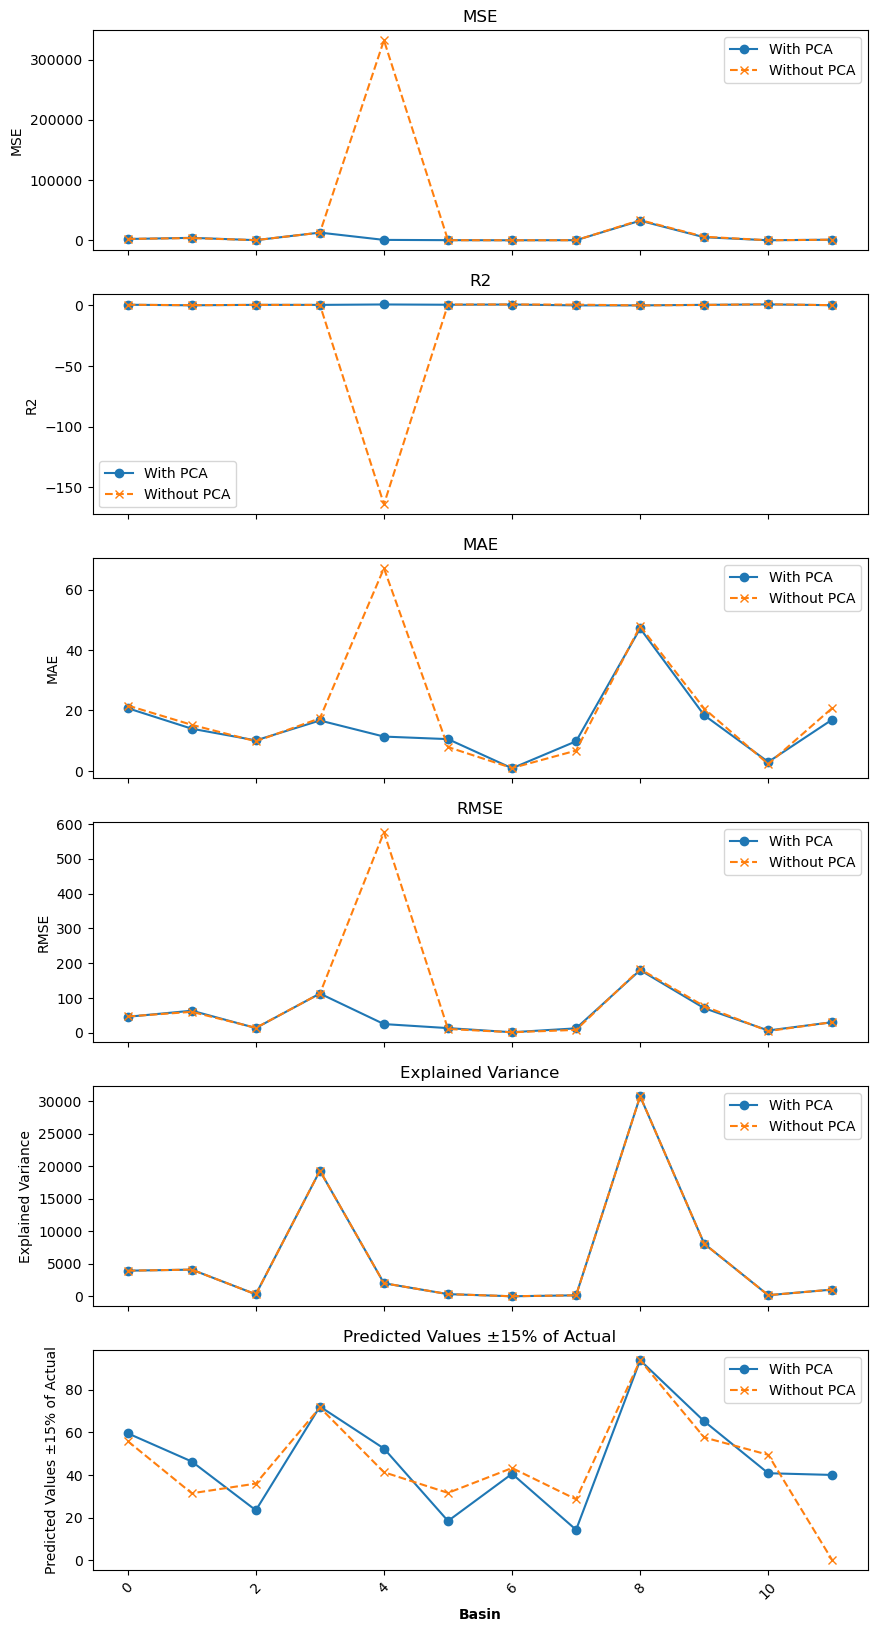

In [48]:
# Define the metrics to compare
metrics = ['MSE', 'R2', 'MAE', 'RMSE', 'Explained Variance', 'Predicted Values ±15% of Actual']

# Merge the two results DataFrames
df_all_results = df_results_pca.join(df_results_no_pca, lsuffix='_with_pca', rsuffix='_without_pca')

# Create a figure and axes for the subplots
fig, axs = plt.subplots(nrows=len(metrics), ncols=1, figsize=(10, 20), sharex=True)

# Plot comparisons for each metric
for idx, metric in enumerate(metrics):
    axs[idx].plot(df_all_results.index, df_all_results[metric + '_with_pca'], marker='o', label='With PCA', linestyle='-')
    axs[idx].plot(df_all_results.index, df_all_results[metric + '_without_pca'], marker='x', label='Without PCA', linestyle='--')
    
    axs[idx].set_ylabel(metric)
    axs[idx].set_title(metric)
    axs[idx].legend()

# Set common labels
plt.xlabel('Basin', fontweight='bold')
plt.xticks(rotation=45)
plt.savefig(f"../../images/performance_comparison_plots/{model}_performance_comparison.png")
plt.show()

## .

In [49]:
# Record end time
end_time = time.time()

# Calculate total run time
total_time = end_time - start_time

print(f"Total run time: {total_time} seconds | {total_time/60} minutes")

Total run time: 229.7416660785675 seconds | 3.829027767976125 minutes
